Q1 : Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

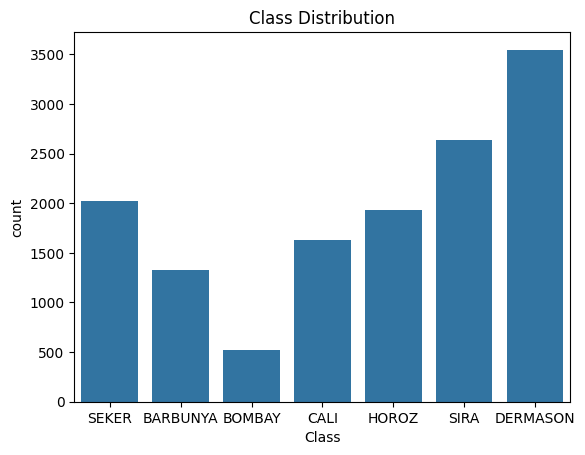


Missing Values:
 Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Number of PCA components to retain 95% variance: 4


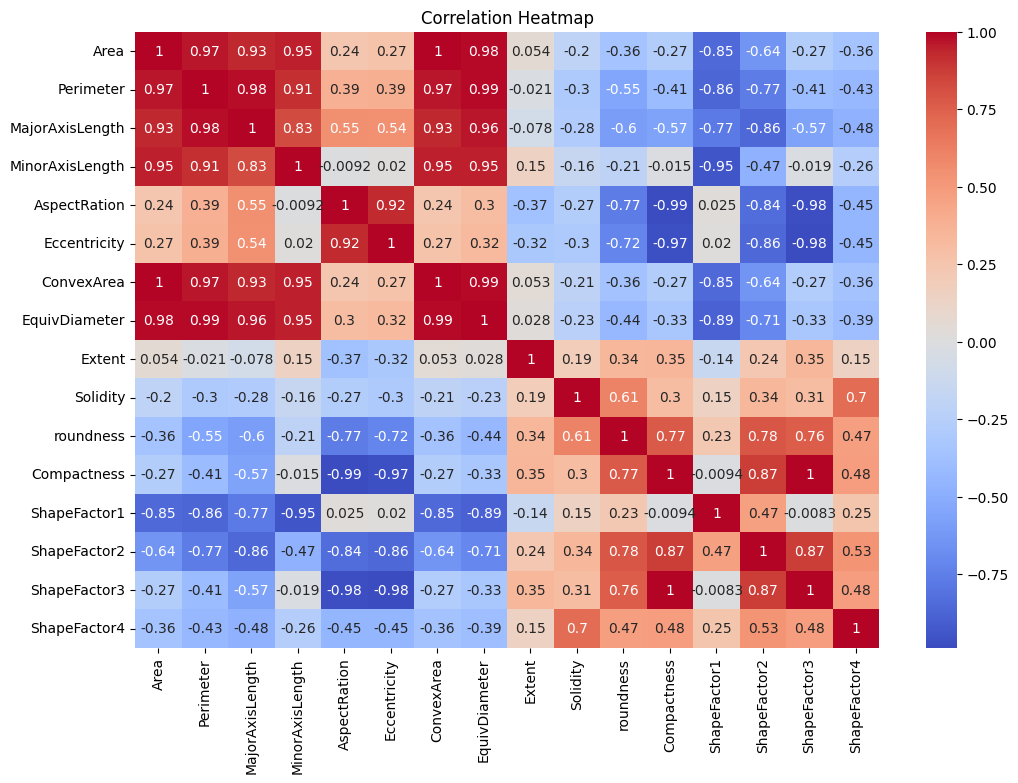

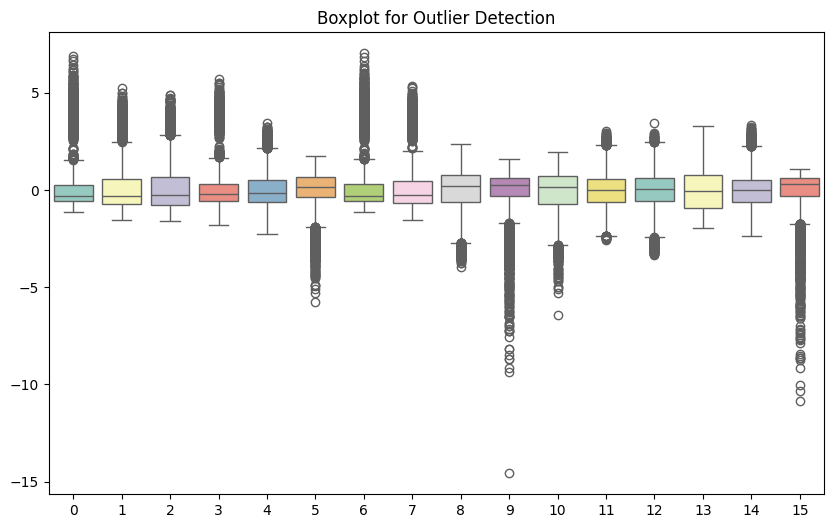

Applying K-Means with 2 clusters.
Silhouette Score (Average): 0.4131
Davies-Bouldin Index: 1.0238
Calinski-Harabasz Index: 10005.6728


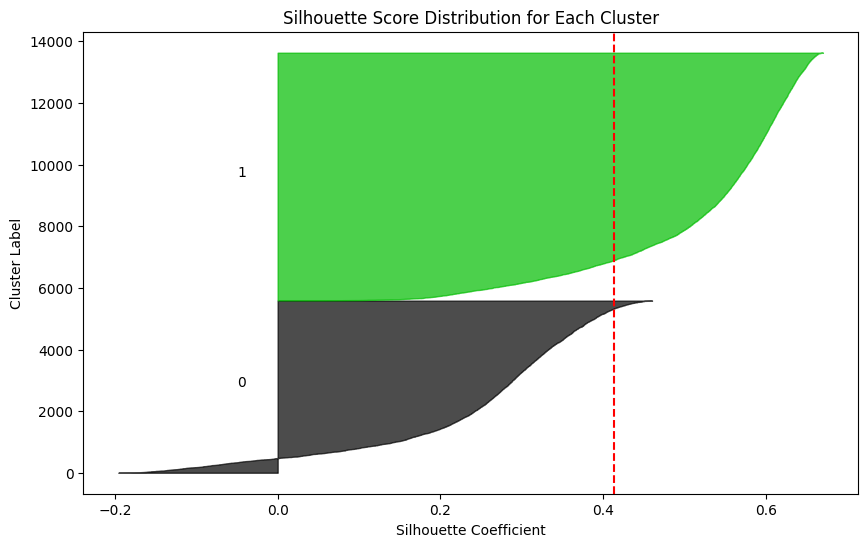

Adjusted Rand Index (ARI): 0.2815
V-Measure: 0.4338


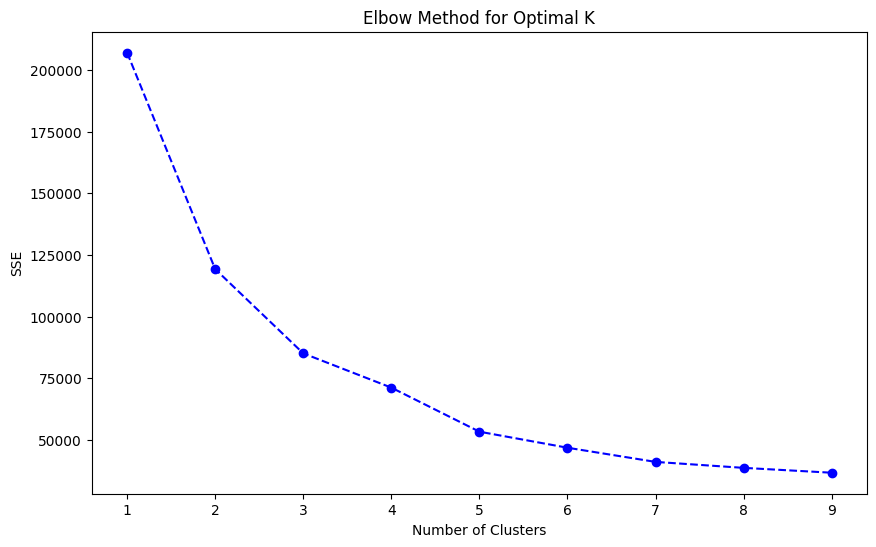

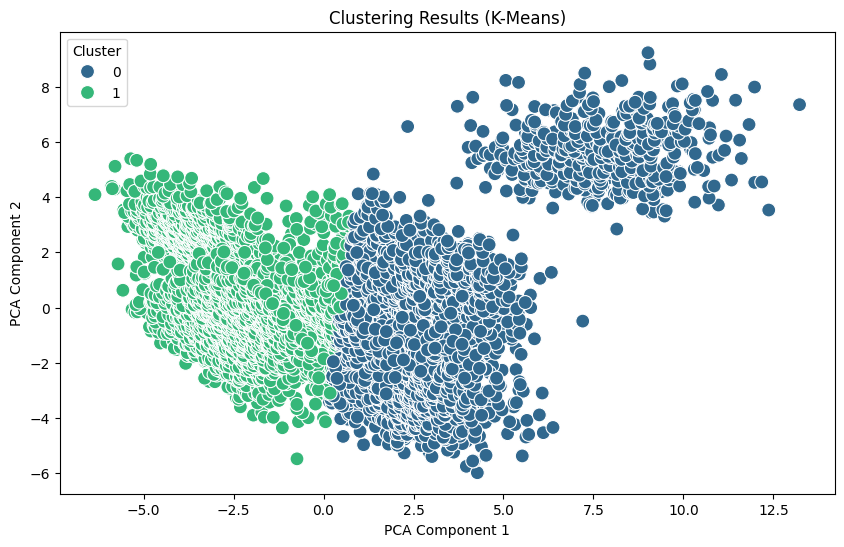

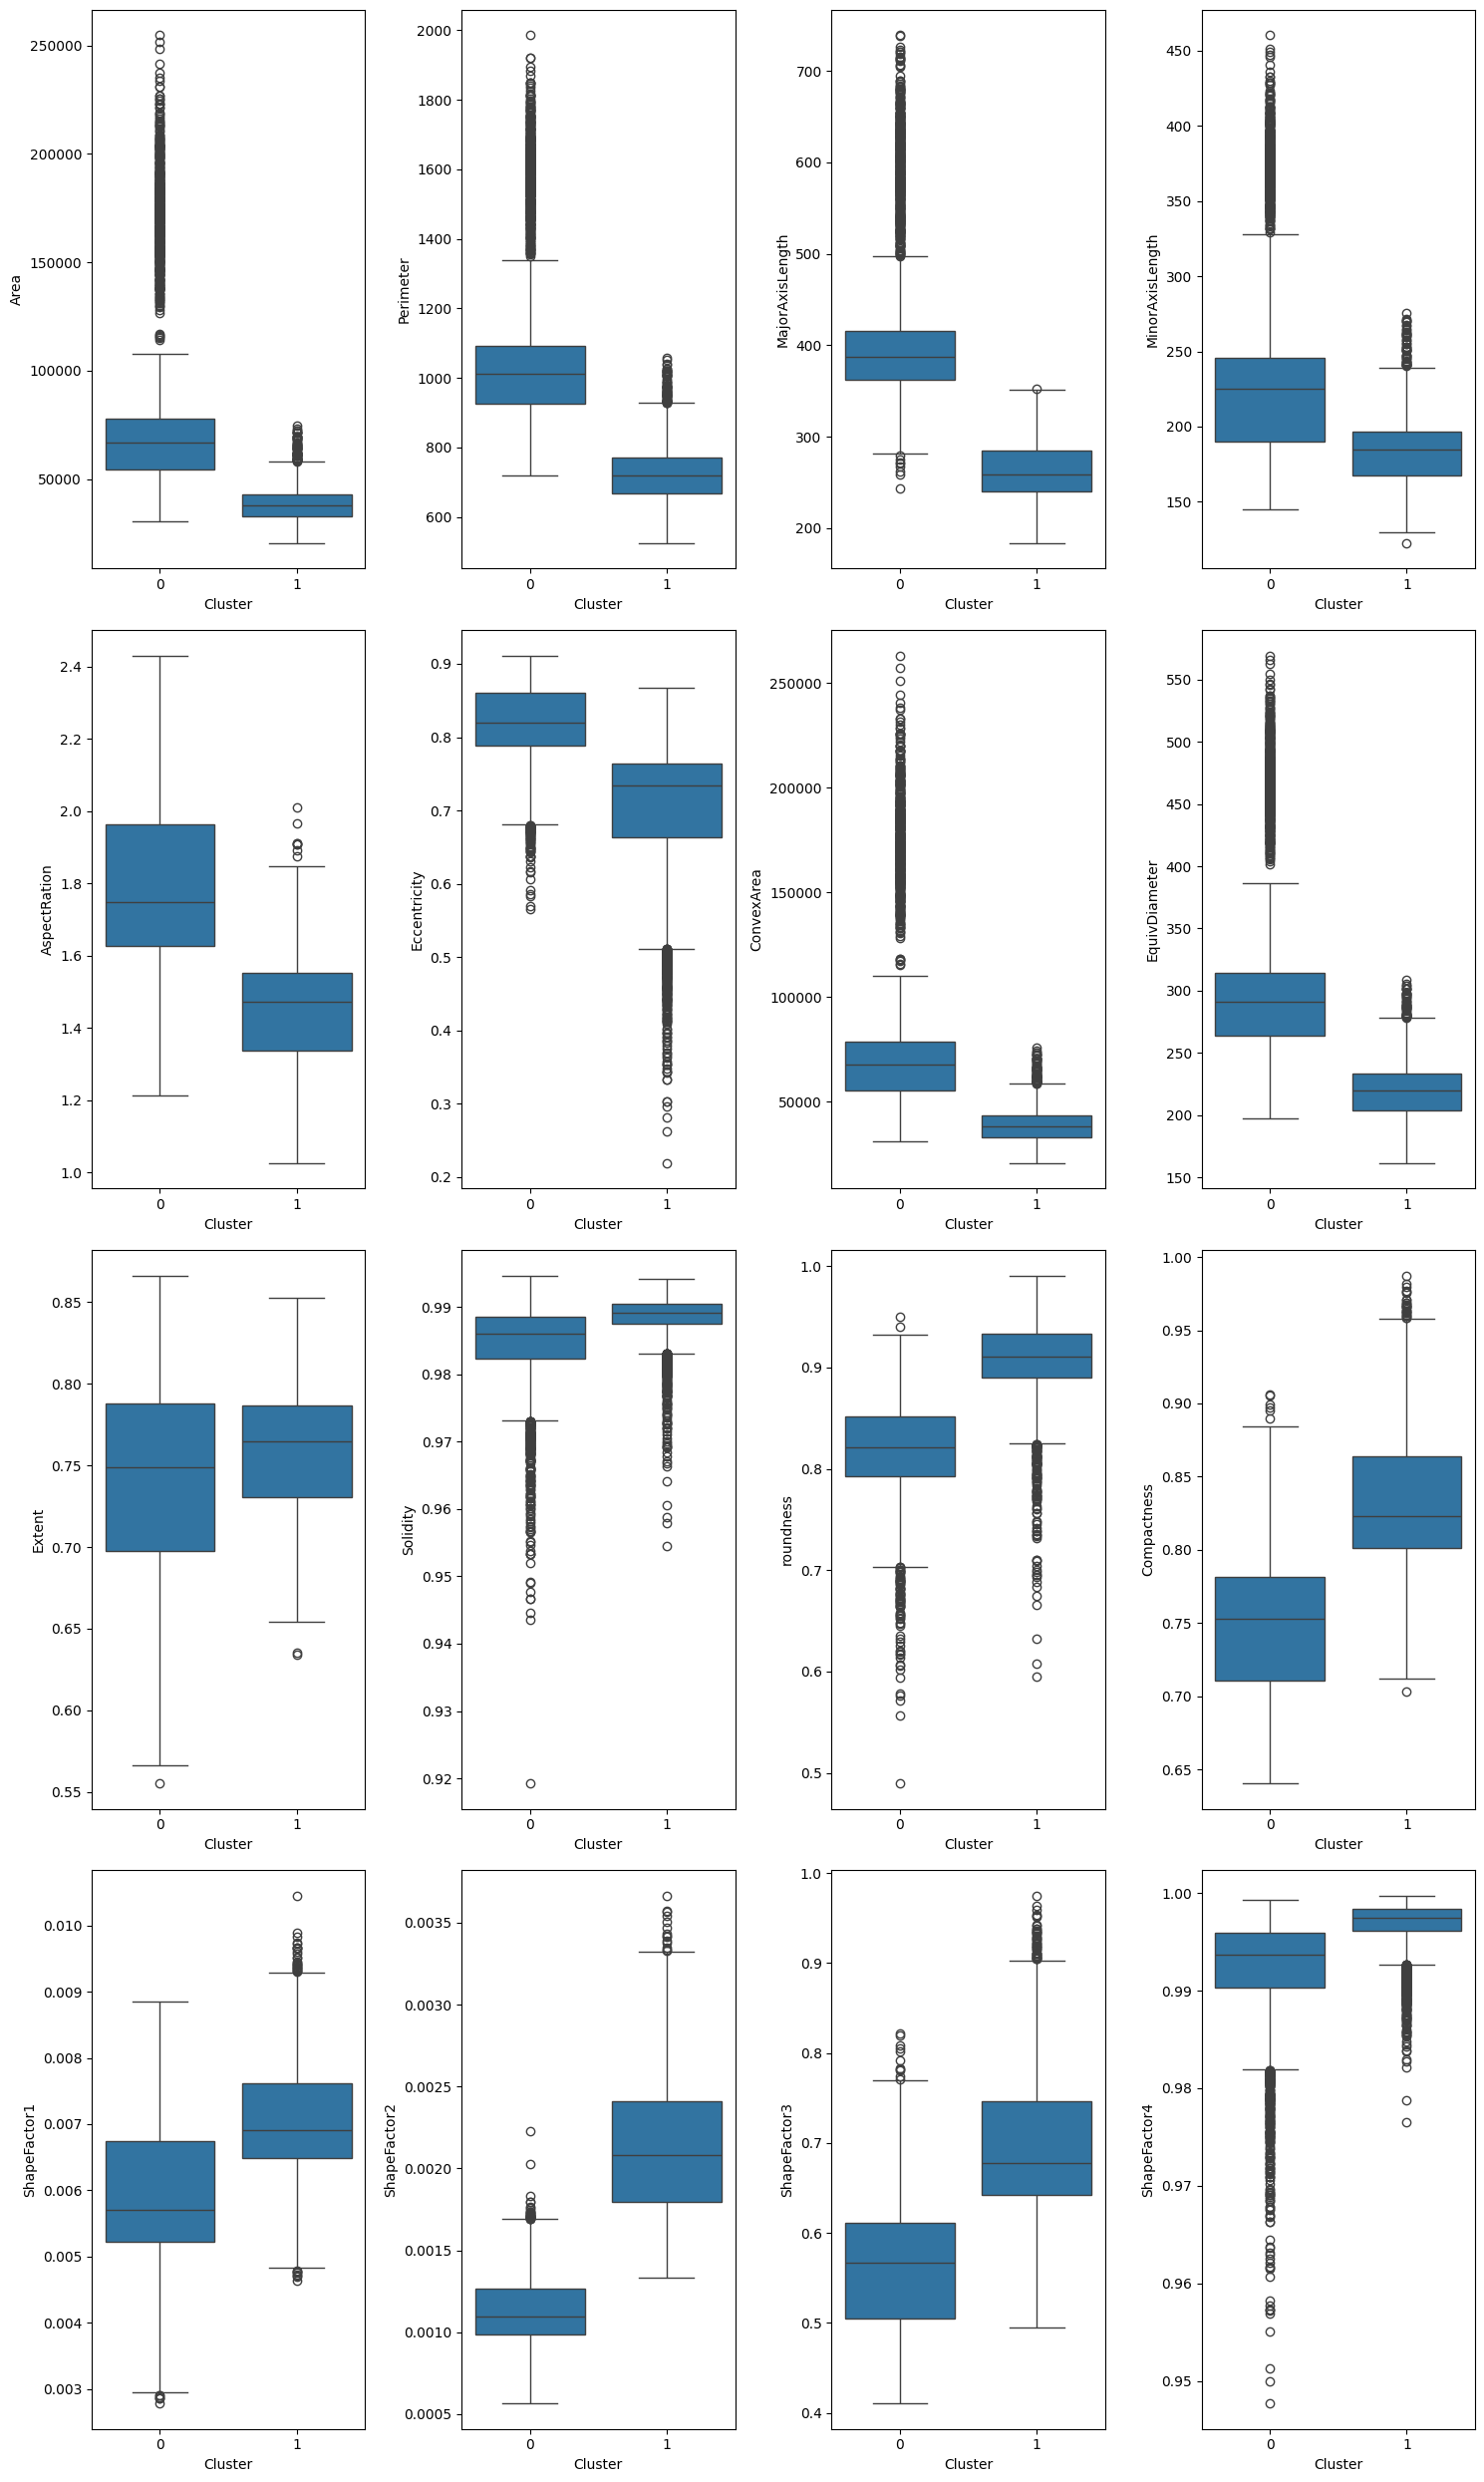

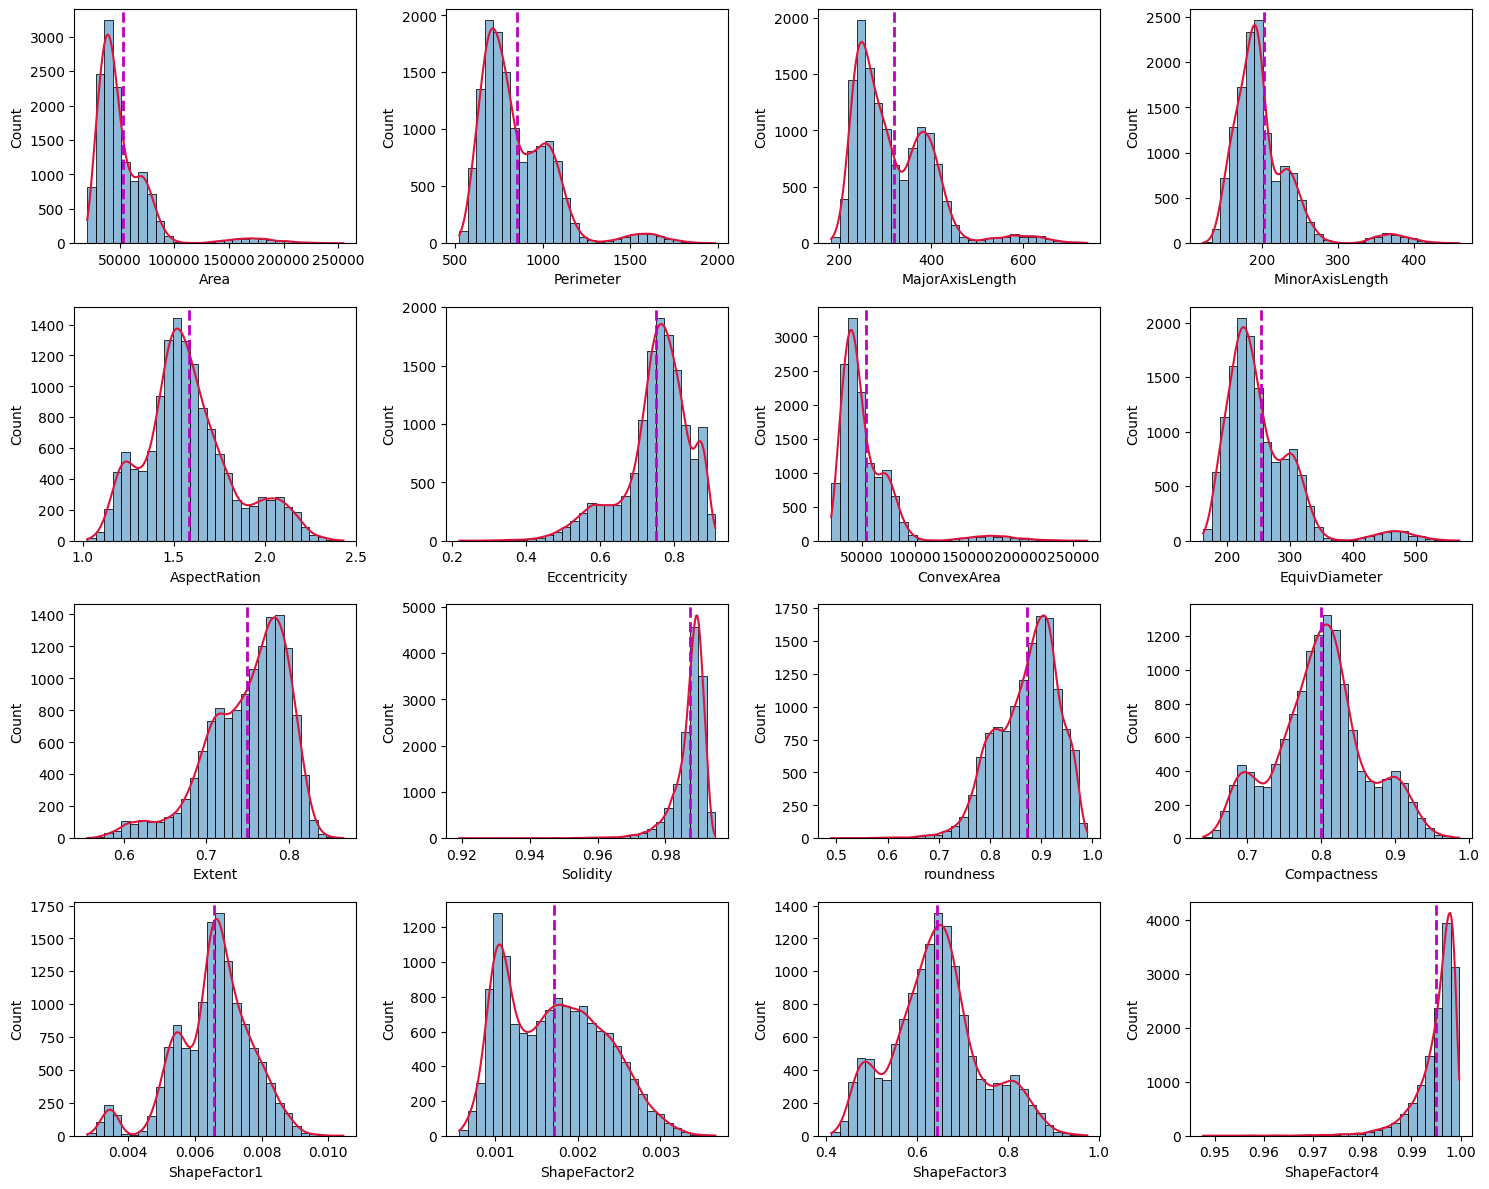

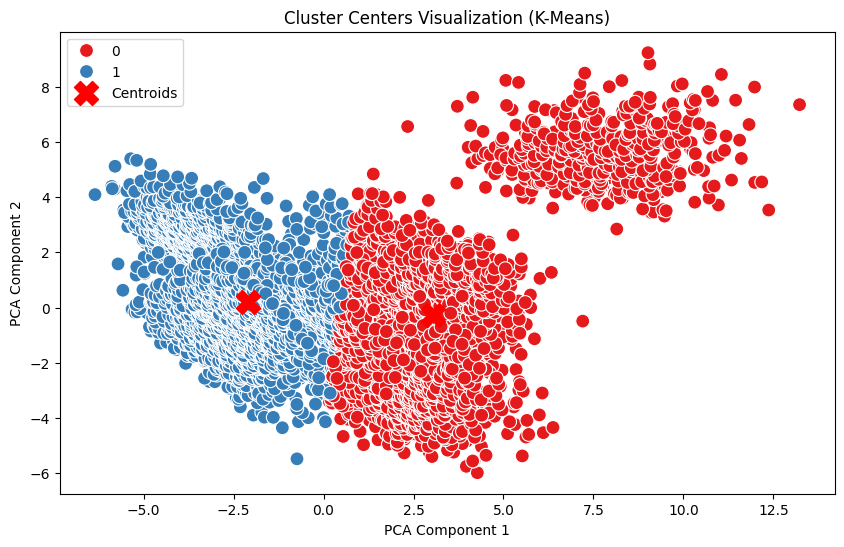

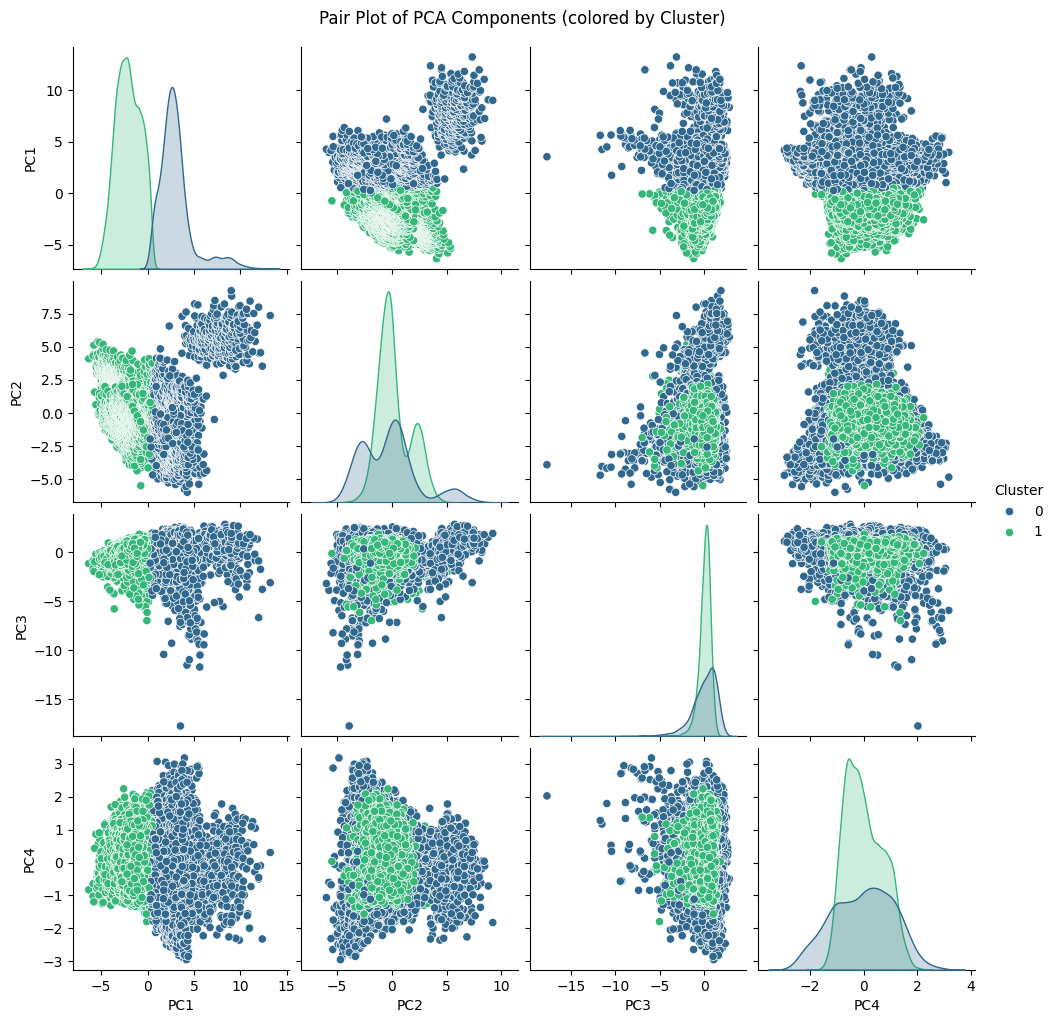


--- Detailed Clustering Evaluation ---
Number of Clusters: 2
Silhouette Score: 0.4131
Davies-Bouldin Index: 1.0238
Calinski-Harabasz Index: 10005.6728
Adjusted Rand Index (ARI): 0.2815
V-Measure: 0.4338

--- Cluster Centers (Mean values of PCA Components for each cluster): ---
        PC1       PC2       PC3       PC4
0  3.033805 -0.279030 -0.052295 -0.021959
1 -2.104712  0.193578  0.036280  0.015234


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, v_measure_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples

# Setting random seed for reproducibility
np.random.seed(1674)

# Loading the dataset
file_path = '/content/Dry_Bean_Dataset.xlsx'
df = pd.read_excel(file_path)

#  Data Preprocessing
df.info()  # Summary of the dataset
print("\nDataset Types:\n", df.dtypes)
print("\nDataset Summary Statistics:\n", df.describe())

# Handling Target Variable - 'Class'
print("\nClass Distribution:\n", df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Data Cleaning
print("\nMissing Values:\n", df.isnull().sum())


true_labels = df['Class']
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
df = df.drop(columns=['Class'])

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA for Dimensionality Reduction
pca = PCA()
pca.fit(df_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of PCA components to retain 95% variance: {n_components}")


pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(df_scaled)

#  Correlation Heatmap (before clustering)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scaled, palette='Set3')
plt.title('Boxplot for Outlier Detection')
plt.show()

# Clustering based on roll number my Roll no : P23CS0010
roll_number = 'P23CS0010'
num_clusters = (int(roll_number[-2:]) % 5) + 2  # K-means formula

#  K-Means clustering
print(f"Applying K-Means with {num_clusters} clusters.")
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans_model.fit_predict(pca_components)

# Computing Silhouette Score and cluster metrics
if len(set(clusters)) > 1:
    silhouette_avg = silhouette_score(pca_components, clusters)
    db_index = davies_bouldin_score(pca_components, clusters)
    ch_index = calinski_harabasz_score(pca_components, clusters)
    print(f"Silhouette Score (Average): {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {db_index:.4f}")
    print(f"Calinski-Harabasz Index: {ch_index:.4f}")

    # Silhouette score distribution plot
    sample_silhouette_values = silhouette_samples(pca_components, clusters)

    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Score Distribution for Each Cluster")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster Label")
    plt.show()
else:
    print("Silhouette Score not applicable (only one cluster identified).")

# ARI and V-Measure
ari = adjusted_rand_score(true_labels_encoded, clusters)
v_measure = v_measure_score(true_labels_encoded, clusters)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"V-Measure: {v_measure:.4f}")

#  Elbow Method for K-Means
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_components)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Clustering Results using PCA Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='viridis', s=100)
plt.title(f'Clustering Results (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Boxplots of Features by Cluster (Outlier Analysis)
pair_plot_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(n_components)])
pair_plot_df['Cluster'] = clusters

fig, ax = plt.subplots(4, 4, figsize=(15, 25))
Numeric_cols = df.columns
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=pair_plot_df['Cluster'], y=df[variable], ax=subplot)
plt.tight_layout()
plt.show()

# Histograms with Mean Line
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g = sns.histplot(df[variable], bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()

# Cluster Centers and Outlier Detection
centers = kmeans_model.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=clusters, palette='Set1', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, marker='X', label='Centroids')
plt.title('Cluster Centers Visualization (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Pair Plot of Features (colored by Cluster)
sns.pairplot(pair_plot_df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of PCA Components (colored by Cluster)', y=1.02)
plt.show()

# Detailed Evaluation of the Clustering Metrics
print("\n--- Detailed Clustering Evaluation ---")
print(f"Number of Clusters: {num_clusters}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Calinski-Harabasz Index: {ch_index:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"V-Measure: {v_measure:.4f}")

# Cluster characteristics summary
cluster_centers = pd.DataFrame(centers, columns=[f'PC{i+1}' for i in range(n_components)])
print("\n--- Cluster Centers (Mean values of PCA Components for each cluster): ---")
print(cluster_centers)


**Plot explaination:**


1.  The class distribution of the Dry Bean Dataset is visualized in the bar plot above. The dataset contains seven different bean types: SEKER, BARBUNYA, BOMBAY, CALI, HOROZ, SIRA, and DERMASON. The counts of each bean type are as follows:

> DERMASON has the highest count, with over 3500 instances.
  SIRA and SEKER also have significant representation, with approximately 2700 and 2000 instances, respectively.
  BOMBAY is the least represented class, with only 522 instances.
  The remaining classes, BARBUNYA, CALI, and HOROZ, have moderate counts between 1000 and 2000.

>This uneven distribution highlights an imbalance in the dataset, with the DERMASON class being significantly larger than others, especially compared to BOMBAY. Such an imbalance can potentially affect the performance of clustering algorithms like K-Means, which assume equal class distribution. Therefore, additional techniques such as class weighting or stratified sampling may need to be considered during analysis to address this imbalance.

2. There is no missing values in dataset.

3. **Feature Correlation Analysis**

> The correlation heatmap visualizes the relationships between different features in the dataset. Strong positive correlations (in red) are observed between Area, Perimeter, ConvexArea, and EquivDiameter, indicating these features are closely related to bean size. AspectRatio and Eccentricity are also highly correlated, reflecting bean elongation.

> In contrast, strong negative correlations (in blue) are seen between AspectRatio and ShapeFactor1/Compactness, showing that elongated beans tend to be less circular or compact. Features like Extent and Solidity exhibit weak correlations with most other features, suggesting they contribute unique information.

> These correlations highlight potential feature redundancies, which can be useful in dimensionality reduction for clustering.

4. The boxplot above illustrates the distribution of multiple features, highlighting the median, interquartile range (IQR), and outliers. The boxes represent the spread of the middle 50% of the data, with the horizontal line inside indicating the median. Whiskers extend to 1.5 times the IQR, and points beyond them are outliers. Several features show a significant number of outliers, which may require further handling in the data preprocessing stage. This visualization helps identify data skewness and variability across features.

5. Silhouette Score Distribution for Clusters

> The silhouette plot above displays the silhouette scores for two clusters (labeled 0 and 1). The silhouette score measures how well-separated each data point is from other clusters, with values closer to 1 indicating better-defined clusters.

 > Cluster 1 (Green): This cluster shows predominantly high silhouette scores, indicating that the data points are well-separated from the other cluster.
 > Cluster 0 (Black): This cluster has some data points with negative or near-zero silhouette scores, suggesting potential overlap or poor separation from other clusters.

> The red dashed line represents the average silhouette score, which is approximately 0.4, indicating moderately well-defined clusters.

6. Elbow Method for Optimal K

> The elbow plot above illustrates the Sum of Squared Errors (SSE) against the number of clusters (K). The goal is to determine the optimal number of clusters where adding more clusters does not significantly reduce the SSE.

> The plot shows a steep decrease in SSE as the number of clusters increases from 1 to 3, indicating that these clusters capture most of the variance in the data.
   After K = 3, the rate of reduction slows, forming an "elbow" at K = 3.

> The "elbow" at K = 3 suggests this is the optimal number of clusters for the dataset, as further increasing K yields diminishing returns in improving the fit.

7. Boxplot Analysis of Shape Factors
 Boxplots reveal that certain shape factors exhibit more variability and outliers across different categories, particularly ShapeFactor2 and ShapeFactor3. The differences in medians and spreads between categories indicate distinctive shape characteristics between the two groups.

8. The histograms display the distribution of various shape-related features (e.g., Area, Perimeter, AspectRatio) for the dataset. Most features, like Area, Perimeter, and ConvexArea, show a right-skewed distribution, indicating that most data points are concentrated at smaller values but with some larger outliers. Features such as AspectRatio and Eccentricity are more symmetrically distributed around a central value. The red lines show a kernel density estimate, and the vertical dashed lines represent the median values of each feature.

9. This scatter plot visualizes the results of K-means clustering using two principal components (PCA) for dimensionality reduction. The plot shows two clusters, represented by blue (Cluster 0) and red (Cluster 1) points. The large red 'X' markers represent the centroids of each cluster. The PCA components allow us to visualize how the data is distributed in a 2D space, where the two clusters are clearly separated. The clustering algorithm has successfully distinguished between the two groups, with minimal overlap between the clusters.

10. Pair plot of the PCA components:

 >  PCA Components: The axes represent different principal components derived from the dataset, which are essentially linear combinations of features that capture the maximum variance in the data.
 > Clusters: The data points are color-coded based on cluster membership, where the colors (blue and green) indicate different clusters (0 and 1 in this case).
>  Relationships: Each subplot compares two principal components against each other, helping visualize the separation of clusters across various combinations of components.
   Diagonal plots: These are KDE (Kernel Density Estimate) plots showing the distribution of data along each PCA component individually, further highlighting the differences in the distributions between the two clusters


# Inference:
As my Roll no. is : P23cs0010,
0+1 = 1 , So: Dry Bean Dataset.
The Dry Bean Dataset contains various morphological features of different types of dry beans.

**Goal:** The objective is to apply clustering techniques to group the data and evaluate cluster quality using internal and external metrics.


*  In Data preprocessing, The target variable 'Class' is label-encoded and the features are standardized to ensure uniformity across the dataset.

*   PCA was performed to reduce dimensionality while retaining 95% of the variance. The number of components retained was 4, as this captures most of the dataset's variance.

* **Clustering Approach**:
As my Roll no. is : P23cs0010, So:
K= (10 mod5) + 2, Therefore, K = 2 clusters were used.

*   Evaluation Metrics:
     * Silhouette Score: 0.4131 indicates that the clusters are reasonably well-separated but there is some overlap between them.
     * Davies-Bouldin Index (DBI): 1.0238 suggests that the clusters are fairly compact and well-separated, but there can be improvement in cluster distinctiveness.
     * Calinski-Harabasz Index (CHI):  High CHI  10005.6728 value reflects that the clusters are well-separated in terms of their variance, despite the moderate silhouette score.
     * Adjusted Rand Index (ARI): 0.2815 indicates some alignment between the clusters and the true labels, but it also shows that the clustering does not fully capture the underlying classes.
     * V-Measure:  0.4338 reflects the balance between homogeneity (each cluster contains only members of a single class) and completeness (all members of a given class are assigned to the same cluster). The moderate value suggests that the clusters partially capture the structure of the true labels but are not perfectly aligned.

Conclusion:

The K-Means clustering method successfully grouped the Dry Bean data into 2 clusters, with a Silhouette Score of 0.4131, indicating moderate separation between clusters. The external evaluation metrics (ARI = 0.2815, V-Measure = 0.4338) show some alignment with the true class labels, but improvements could be made to better capture separability.

Q2: **Maximum Likelihood Estimation (MLE) for Parameter
Estimation**

Number of PCA components explaining 95% variance: 4
Selected Feature Index: 2
Selected Feature Values: [-0.74902104 -2.18237398 -0.5140376  ...  0.38720635 -0.14408831
  0.99412157]
Learning Rate: 0.083
Mean (μ) of selected feature: 2.7797354781980637e-17
Covariance (Σ) of selected feature: 1.2810502765656562
Confusion Matrix:
 [[252   0 103   0   7   5  28]
 [  0 161   0   0   0   0   0]
 [ 55   0 402   0  13   1   8]
 [  1   0   0 923   5  23  91]
 [  2   0  11   1 559   0  15]
 [  1   0   1  27   0 574  16]
 [  7   0   2  97  22   1 670]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71       395
           1       1.00      1.00      1.00       161
           2       0.77      0.84      0.81       479
           3       0.88      0.88      0.88      1043
           4       0.92      0.95      0.94       588
           5       0.95      0.93      0.94       619
           6       0.81      0.84      0.82     

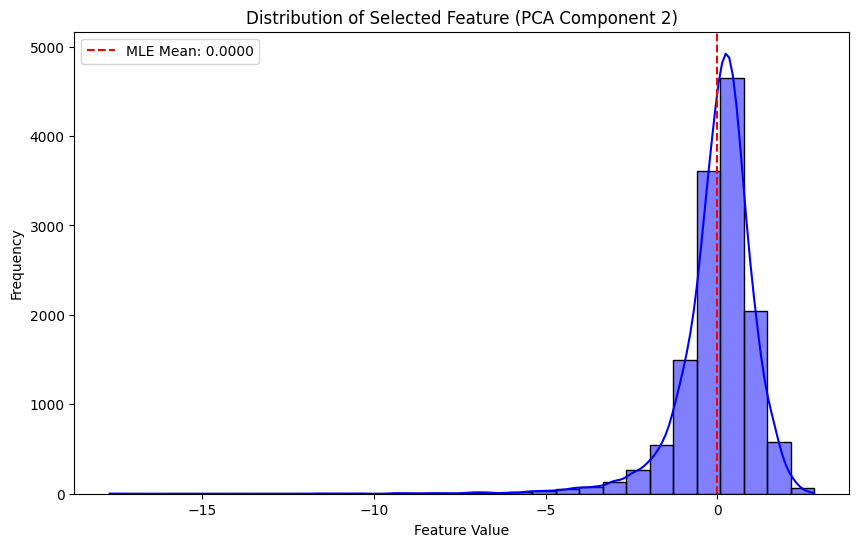

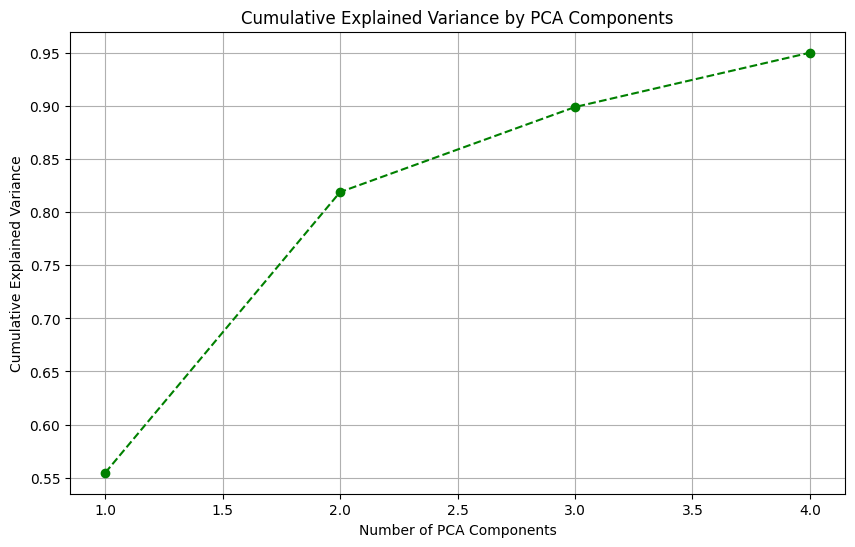

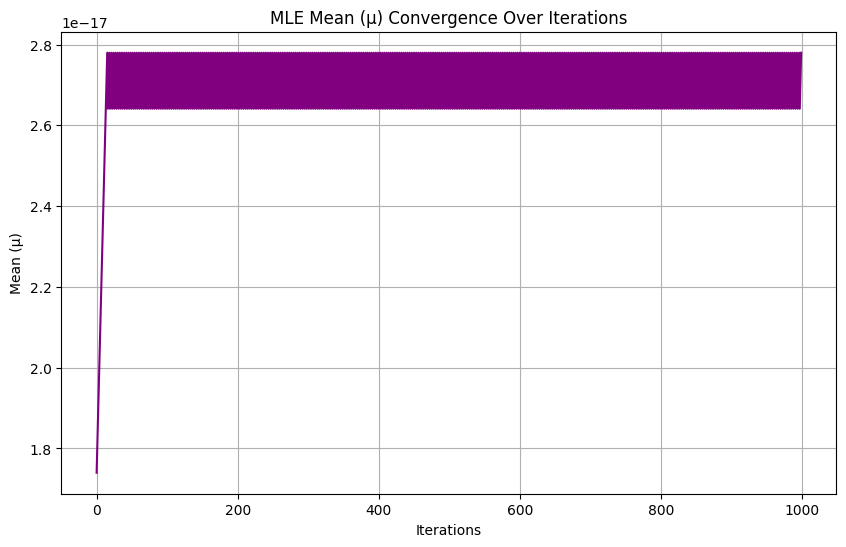

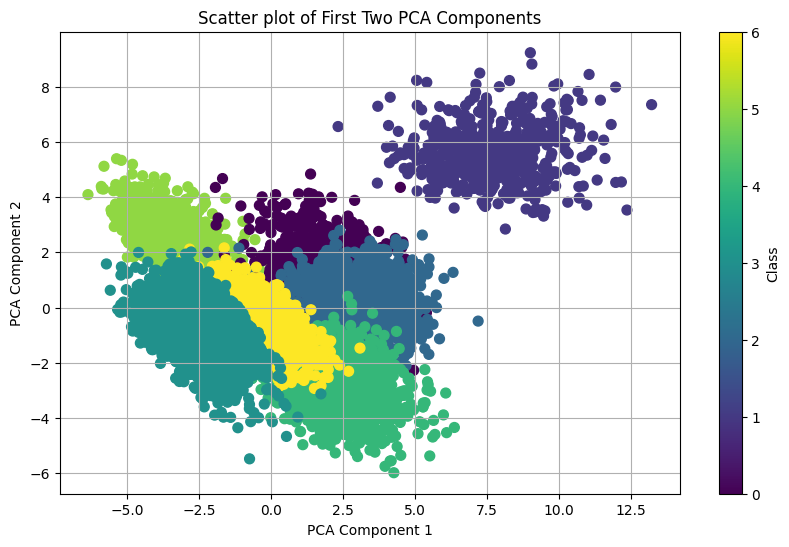

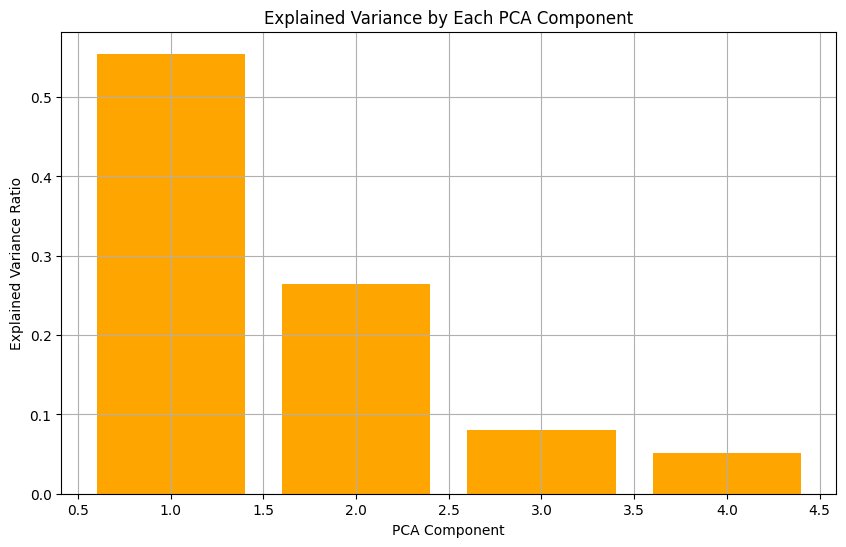

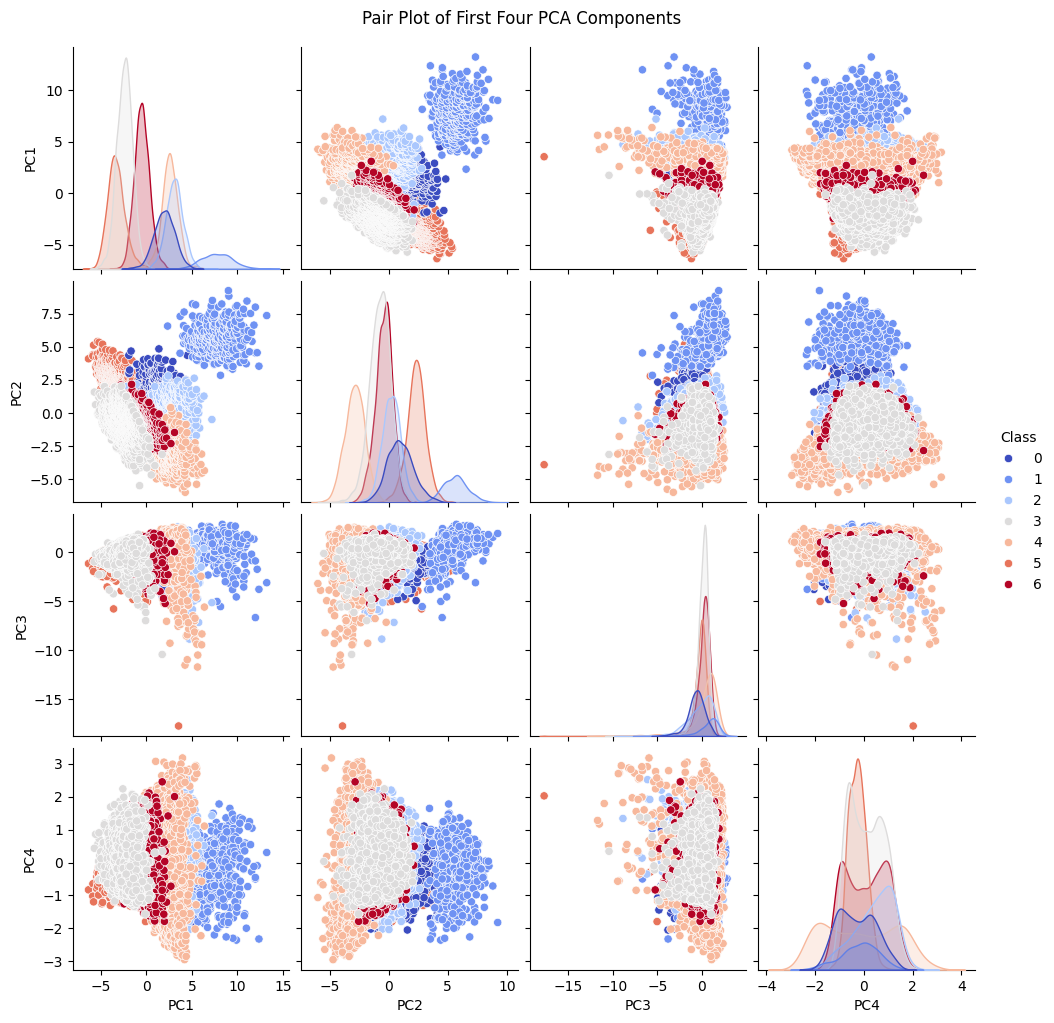

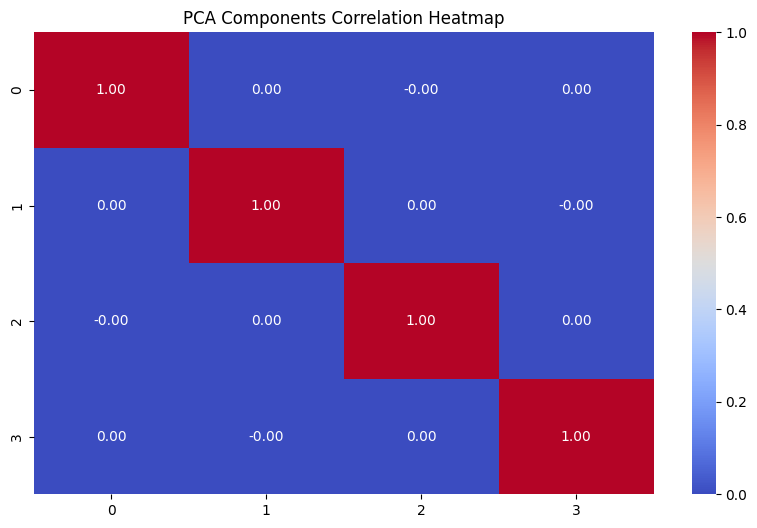

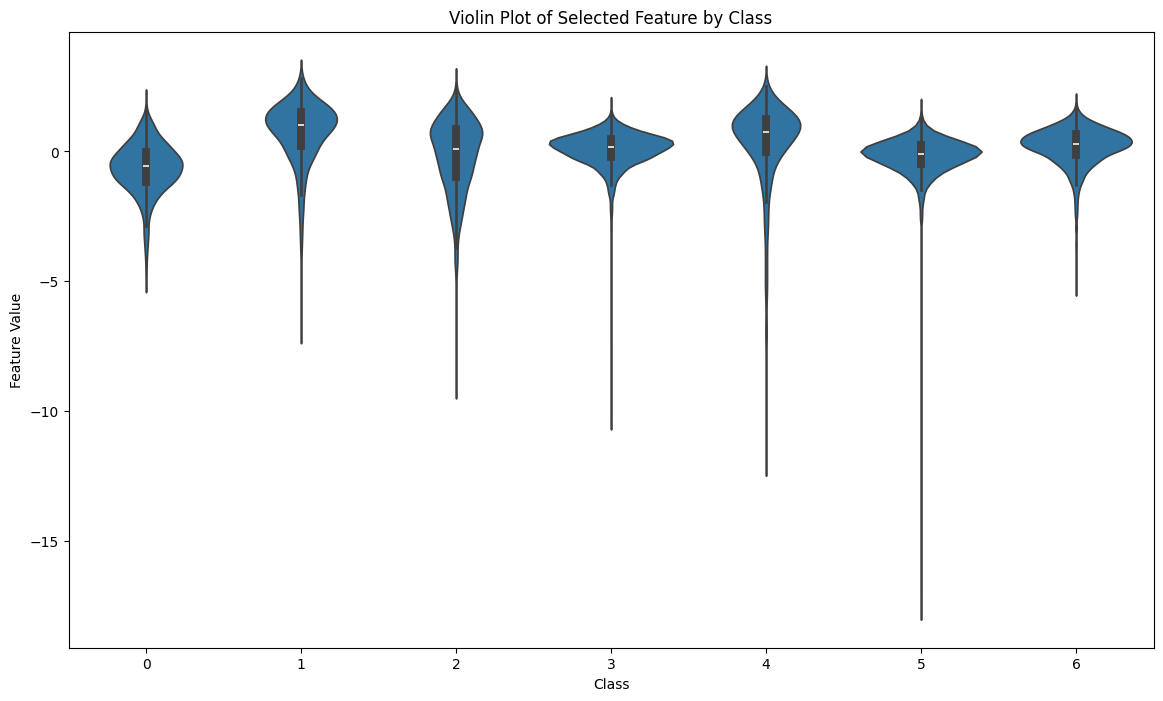

Silhouette Score: 0.3975
Adjusted Rand Index (ARI): 0.3849


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


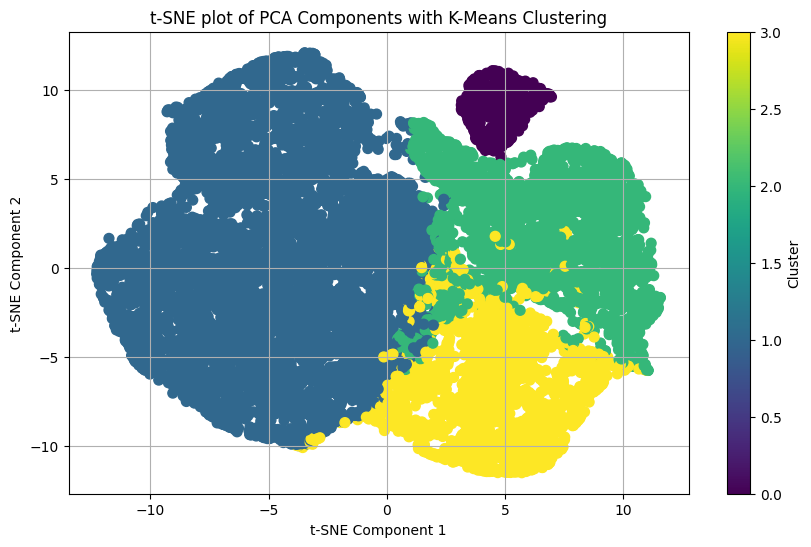

Clustering Precision: 0.0687
Clustering Recall: 0.1212
Clustering F1-Score: 0.0861


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score, adjusted_rand_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
np.random.seed(1674)


features = data.drop(columns=['Class'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)


n_components = pca.n_components_
print(f"Number of PCA components explaining 95% variance: {n_components}")

# Feature selection based on the first letter of my name: NIDHI SONI(N = 78)
selected_feature_index = 78 % pca_features.shape[1]
print("Selected Feature Index:", selected_feature_index)
selected_feature = pca_features[:, selected_feature_index]
print("Selected Feature Values:", selected_feature)

# Initialize learning rate based on ASCII of 'S' (first letter of your last name) and roll number : P23CS0010
ascii_value_of_S = ord('S')  # ASCII value of 'S' = 83
last_digit_of_roll_number = 0
learning_rate = ascii_value_of_S / 1000 + last_digit_of_roll_number * 0.001

# Regularization based on First letter of first name
ascii_value_of_N = ord('N')
regularization = (ascii_value_of_N / 100) * last_digit_of_roll_number

# Function to compute MLE for mean and covariance using gradient descent
def mle_gaussian_with_learning_rate(data, learning_rate, regularization, iterations=1000):
    # Initialize mean and covariance
    mu = np.mean(data)
    sigma = np.var(data)
    mu_list = []  # To store mu values for plotting convergence

    # Gradient descent for MLE with learning rate
    for i in range(iterations):
        # Gradient of log-likelihood with respect to mu
        gradient_mu = -np.sum(data - mu) / len(data)
        # Update mu with learning rate
        mu -= learning_rate * gradient_mu
        mu_list.append(mu)


    sigma = np.var(data) + regularization  # Regularization added to covariance
    return mu, sigma, mu_list

mu, sigma, mu_convergence = mle_gaussian_with_learning_rate(selected_feature, learning_rate, regularization)

# MLE results
print("Learning Rate:", learning_rate)
print("Mean (μ) of selected feature:", mu)
print("Covariance (Σ) of selected feature:", sigma)

# --- Classification using Gaussian Naive Bayes ---

# Label encoding for the target variable 'Class'
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['Class'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, encoded_labels, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Error Rate
error_rate = np.mean(y_pred != y_test)
print("Error Rate:", error_rate)

# ROC AUC score (for multiclass classification)
try:
    auc_score = roc_auc_score(y_test, gnb.predict_proba(X_test), multi_class="ovr", average="weighted")
    print(f"ROC-AUC Score: {auc_score:.4f}")
except ValueError:
    print("ROC-AUC is not applicable for multiclass without probability estimates.")

# --- Visualizations ---

# 1. Distribution of the selected feature with MLE Mean
plt.figure(figsize=(10, 6))
sns.histplot(selected_feature, bins=30, kde=True, color='blue')
plt.axvline(mu, color='red', linestyle='--', label=f'MLE Mean: {mu:.4f}')
plt.title(f'Distribution of Selected Feature (PCA Component {selected_feature_index})')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. PCA explained variance for each component
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 3. MLE Mean (μ) Convergence over Iterations
plt.figure(figsize=(10, 6))
plt.plot(mu_convergence, color='purple')
plt.title('MLE Mean (μ) Convergence Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean (μ)')
plt.grid(True)
plt.show()

# 4. Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=encoded_labels, cmap='viridis', s=50)
plt.title('Scatter plot of First Two PCA Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# 5. Variance contribution of each PCA component
plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='orange')
plt.title('Explained Variance by Each PCA Component')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# 6. Pair Plot of First Few PCA Components
pca_df = pd.DataFrame(pca_features[:, :4], columns=[f'PC{i+1}' for i in range(4)])
pca_df['Class'] = encoded_labels
sns.pairplot(pca_df, hue='Class', palette='coolwarm')
plt.suptitle('Pair Plot of First Four PCA Components', y=1.02)
plt.show()

# 7. Heatmap of PCA Component Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(np.corrcoef(pca_features.T), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Components Correlation Heatmap')
plt.show()

# 8. Violin Plot of PCA Components
plt.figure(figsize=(14, 8))
sns.violinplot(x='Class', y=selected_feature, data=pd.concat([pd.Series(encoded_labels, name='Class'), pd.Series(selected_feature, name='Feature')], axis=1))
plt.title('Violin Plot of Selected Feature by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()

# --- Clustering using K-Means for Comparison ---

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)

# Clustering Evaluation Metrics
silhouette_avg = silhouette_score(pca_features, kmeans_labels)
ari_score = adjusted_rand_score(encoded_labels, kmeans_labels)

print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Adjusted Rand Index (ARI): {ari_score:.4f}')

# Visualize Clustering Results with t-SNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(pca_features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('t-SNE plot of PCA Components with K-Means Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# --- Comparison of Clustering and Classification ---
# Calculate Precision, Recall, F1-Score for clustering
precision = precision_score(encoded_labels, kmeans_labels, average='weighted')
recall = recall_score(encoded_labels, kmeans_labels, average='weighted')
f1 = f1_score(encoded_labels, kmeans_labels, average='weighted')

print(f'Clustering Precision: {precision:.4f}')
print(f'Clustering Recall: {recall:.4f}')
print(f'Clustering F1-Score: {f1:.4f}')

**Plots**:
1. **Histogram with a kernel density estimate** (KDE) curve:

   Histogram: The blue bars represent the frequency of data points for different values of the selected PCA component.
  KDE Curve: The smooth blue line over the histogram estimates the probability density function of the data.
  Red dashed line: This represents the MLE  mean value, which is labeled in the plot (MLE Mean: 0.0000). It indicates where the mean of the selected feature lies, based on the MLE process.

 The plot helps visualize the distribution of values in the selected PCA component and highlights the estimated mean using MLE.

2. **Cumulative explained variance**:
The plot shows the cumulative explained variance by PCA components:

> X-axis: Number of PCA components.

> Y-axis: Cumulative explained variance.

> Each green point represents the cumulative amount of variance explained as more components are added. As we add more PCA components, the total explained variance approaches 95%. This plot helps to determine how many principal components are necessary to capture most of the data's variability.

3. **Maximum Likelihood Estimate**:  
The graph depicts the convergence of the Maximum Likelihood Estimate (MLE) of the mean (μ) over iterations. The values quickly stabilize at approximately 2.8e-17, showing that the mean converges almost instantly after the first iteration and remains constant, indicating successful and fast convergence of the estimation process.

4. **Scatter Plot**:
> The scatter plot visualizes the first two principal components (PCA) for the dataset, with different colors representing distinct classes. The PCA reduces the dataset's dimensionality while preserving as much variance as possible, allowing us to see the separation between different classes. The plot reveals clear clustering of classes, with some overlap between certain groups, indicating that PCA helps in distinguishing the data into meaningful clusters based on class.

5. **Bar Plot**:
> The bar plot shows the explained variance ratio for each PCA component. The first component captures over 50% of the data's variance, the second around 25%, while the third and fourth contribute much less. This suggests that the first two components are key in retaining most of the dataset's variability.
  * This plot helps in deciding how many components to retain in further analysis.

6. **Pair Plot**:
> This pair plot is useful in understanding how different classes spread in the lower-dimensional space created by PCA and helps evaluate whether the components are useful for further classification tasks.
PC1 and PC2 show a significant separation between Class 0 (blue) and other classes, indicating that these components capture most of the variance related to this class.

7. **PCA Components Correlation Heatmap**:
> PCA Components Correlation Heatmap:
     All PCA components are uncorrelated with each other (correlations close to 0), confirming that PCA successfully reduced redundancy.
     Diagonal values are 1, indicating perfect correlation with themselves.

 > These observations confirm that PCA was effective in transforming the data into independent components that highlight class differences.

8. **Violin Plot**:
This violin plot shows the distribution of a selected feature across different classes. Each violin represents the feature's density, with an overlaid box plot indicating the median and interquartile range (IQR).

  > Feature Variability: Some classes (e.g., 3rd and 5th) have a more concentrated distribution, while others (e.g., 2nd) show higher variability.
  > Distribution Shape: Most classes have symmetric distributions, but some exhibit skewness or long tails, indicating outliers (e.g., 1st and 6th classes).
  > Class Separation: Distinct feature distributions across classes suggest some classes may be easier to classify (e.g., 1st, 4th), while overlapping distributions (e.g., 2nd, 5th) may pose challenges.

9. **t-SNE Plot**:
> This t-SNE plot visualizes the PCA-reduced data, clustered using the K-Means algorithm. The plot shows how data points are grouped into four distinct clusters (0, 1, 2, 3) based on color, with cluster separation visualized in the 2D space.
> Cluster Interpretation: The plot reveals that the clusters are well-separated, indicating a meaningful partitioning of data by K-Means. Some overlap is seen between the green (cluster 2) and yellow (cluster 3) groups, suggesting some proximity between those clusters in the feature space.

 > Dimensionality Reduction: The use of PCA components for dimensionality reduction before t-SNE effectively captures the variance in the data while preserving the global structure of clusters.


# Inference:

 **Goal**: The objective is to perform Maximum Likelihood Estimation for parameter estimation using a selected feature derived from PCA.

* PCA Result: 4 principal components are selected, reducing the number of features while preserving significant data variation.
    
* Learning Rate: The learning rate was computed based on the ASCII value of 'S' (83) and the roll number formula, resulting in a learning rate of 0.083.

* Mean and Covariance:

 * Mean of selected feature : 2.849 indicates, data is centered around zero after standardization.The mean is used to compute the Gaussian likelihood of the data points in the selected feature during classification. It represents the central tendency of the feature values.
 * The covariance: 1.281 shows variability in selected PCA component.Covariance measures the spread of the feature values. It is used to define the shape of the Gaussian distribution for the feature, which is crucial in calculating likelihoods and probabilities for classification.

Error Rate:
  * Value: The error rate was calculated as 0.1329, which corresponds to the proportion of misclassified instances.The error rate indicates how often the model makes incorrect predictions, and it serves as an important indicator of model performance.
  * ROC-AUC Score: 0.9844, indicating a high-quality model with excellent discrimination ability between positive and negative classes.It is used to evaluate the overall performance of the classification model by measuring its ability to distinguish between classes.


Clustering Metrics:

   * Silhouette Score: 0.3975 – Measures the cohesion and separation of clusters.
   * Adjusted Rand Index (ARI): 0.3849 – Evaluates the similarity between predicted and true clusters.
   * Clustering Precision: 0.0687, Clustering Recall: 0.1212, Clustering F1-Score: 0.0861 – Metrics that evaluate the clustering performance based on correctly predicted cluster memberships.
Usage: These clustering metrics are used to assess the quality of the clustering model, indicating how well the data points were grouped.





Q2: Maximum Likelihood Estimation (MLE) for Parameter
Estimation **(K-Fold Cross-Validation)**

Number of PCA components explaining 95% variance: 4
Learning Rate: 0.083
Mean (μ) of selected feature: 2.7797354781980637e-17
Covariance (Σ) of selected feature: 1.2810502765656562

--- Fold 1 ---
Fold Precision: 0.8581725072017321
Fold Recall: 0.8578773411678297
Fold F1-Score: 0.8568567039515134
Fold Error Rate: 0.1421226588321704

--- Fold 2 ---
Fold Precision: 0.8709464472147889
Fold Recall: 0.8714180749448934
Fold F1-Score: 0.8700893533691053
Fold Error Rate: 0.12858192505510654

--- Fold 3 ---
Fold Precision: 0.8615429911819523
Fold Recall: 0.8618662747979426
Fold F1-Score: 0.8607231409464968
Fold Error Rate: 0.1381337252020573

--- Fold 4 ---
Fold Precision: 0.8630415329206189
Fold Recall: 0.864070536370316
Fold F1-Score: 0.8623771972831509
Fold Error Rate: 0.13592946362968406

--- Fold 5 ---
Fold Precision: 0.8711546124226499
Fold Recall: 0.8710506980161646
Fold F1-Score: 0.8702182985802819
Fold Error Rate: 0.12894930198383542

--- Average Performance over 5 folds ---
Average Pr

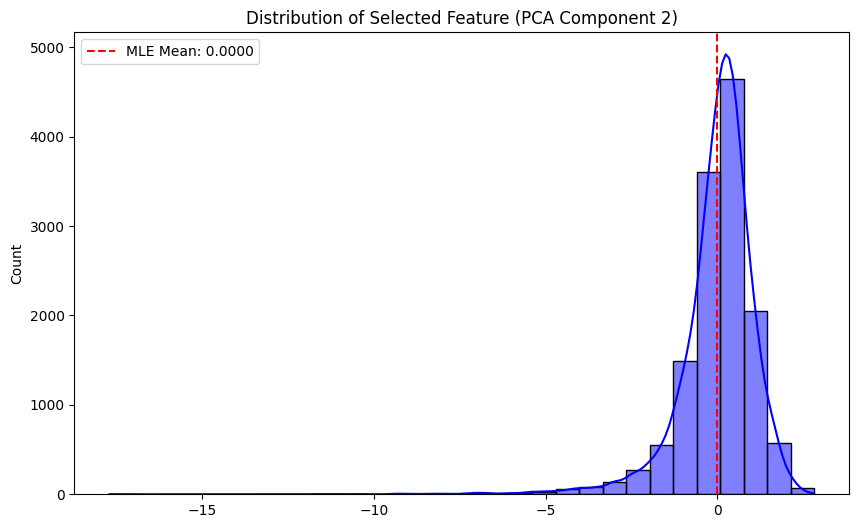

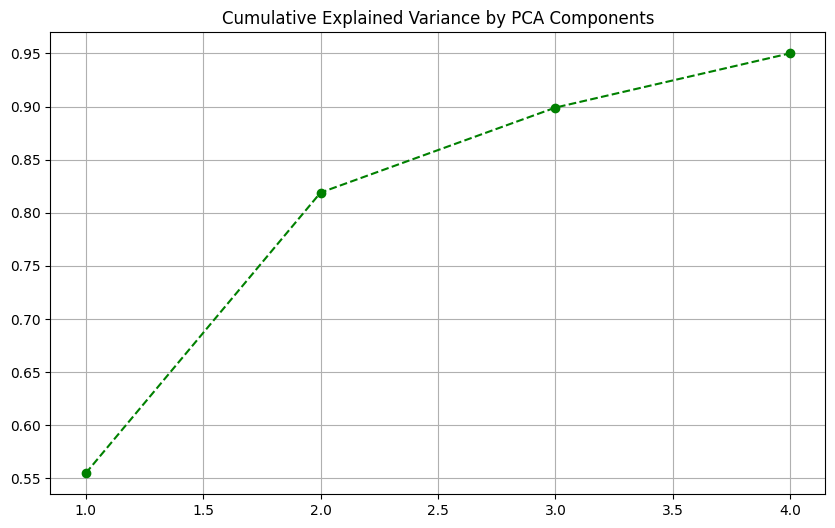

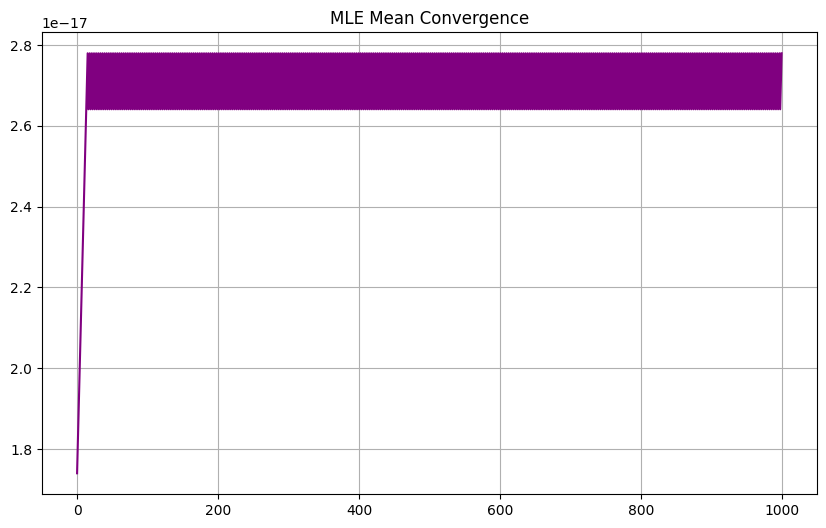

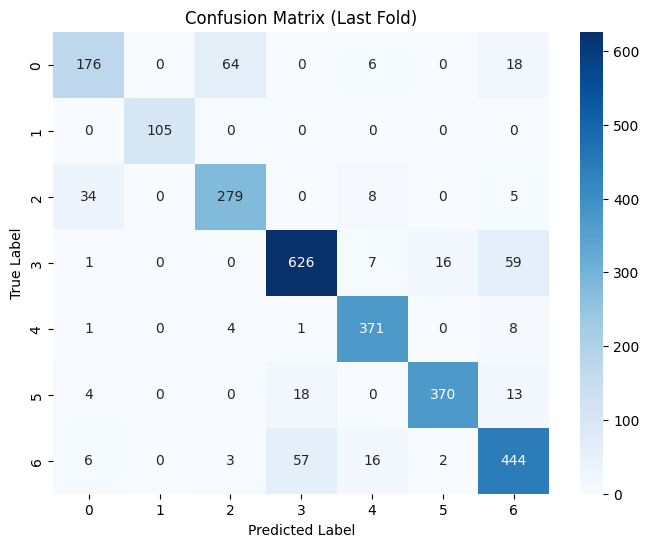


Classification Report (Last Fold):
               precision    recall  f1-score   support

           0       0.79      0.67      0.72       264
           1       1.00      1.00      1.00       105
           2       0.80      0.86      0.83       326
           3       0.89      0.88      0.89       709
           4       0.91      0.96      0.94       385
           5       0.95      0.91      0.93       405
           6       0.81      0.84      0.83       528

    accuracy                           0.87      2722
   macro avg       0.88      0.87      0.88      2722
weighted avg       0.87      0.87      0.87      2722

ROC-AUC Score: 0.9827


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


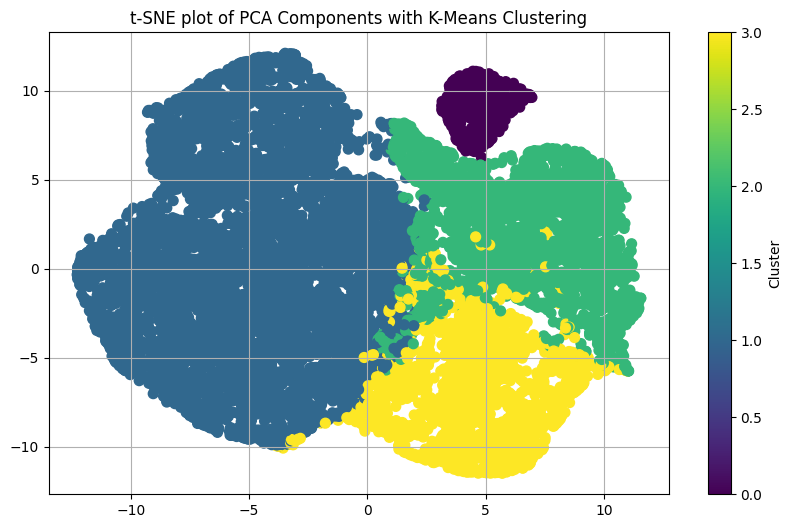

<ipython-input-8-13403a569b2e>:191: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Selected Feature', data=violin_data, palette='coolwarm')


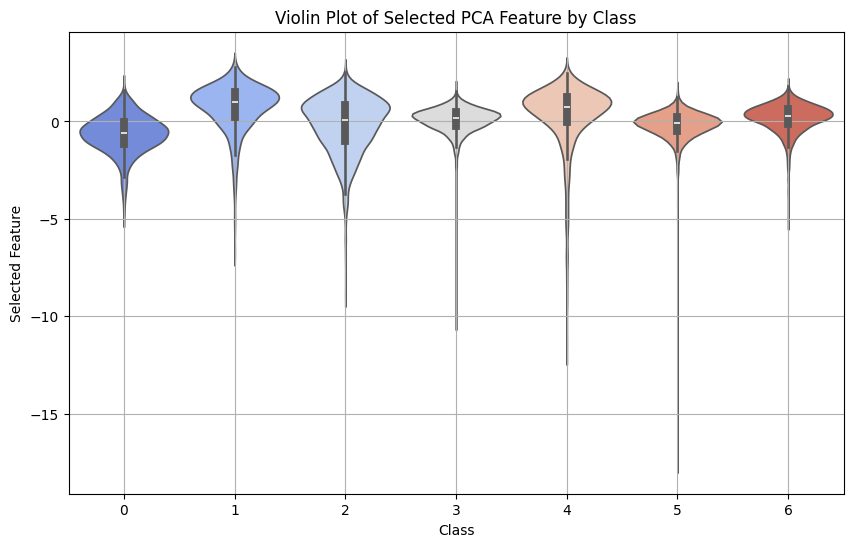

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Clustering Precision: 0.0687
Clustering Recall: 0.1212
Clustering F1-Score: 0.0861


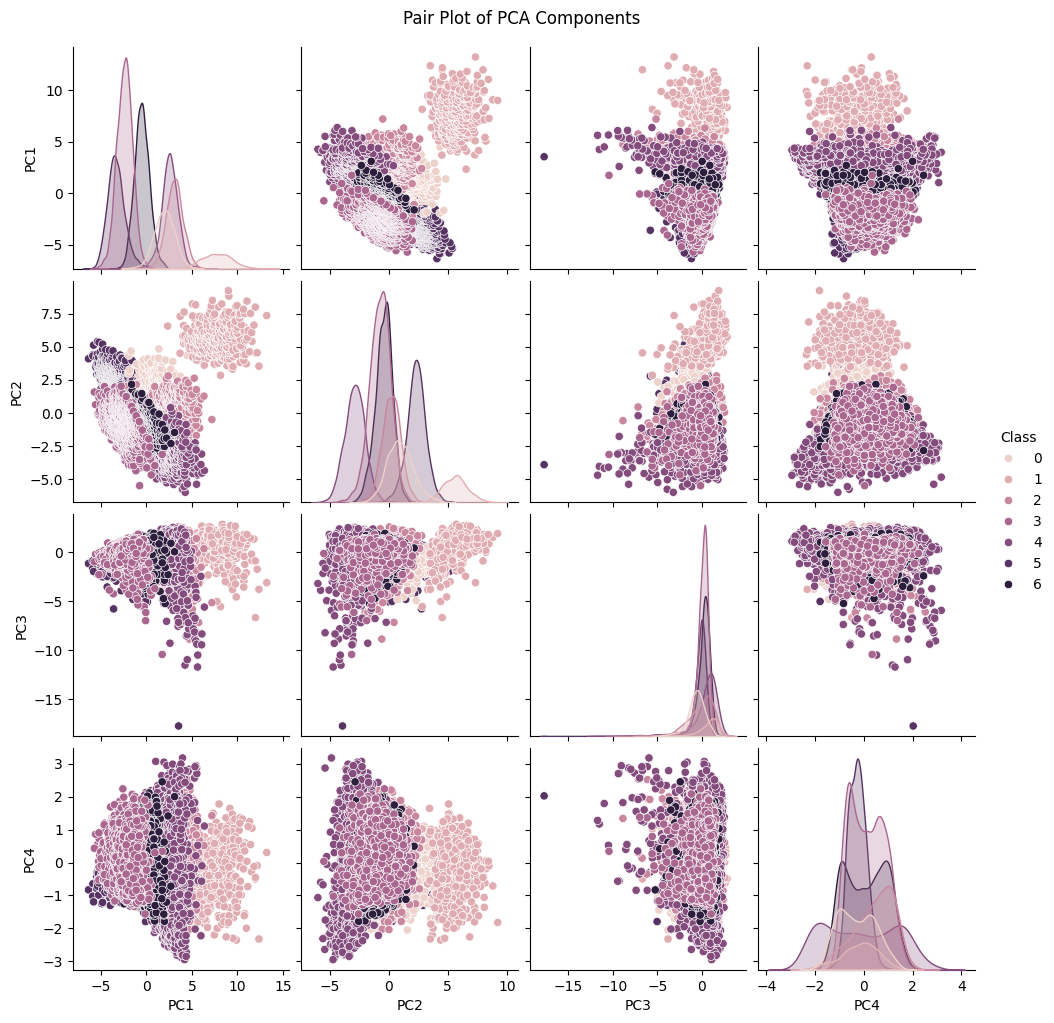

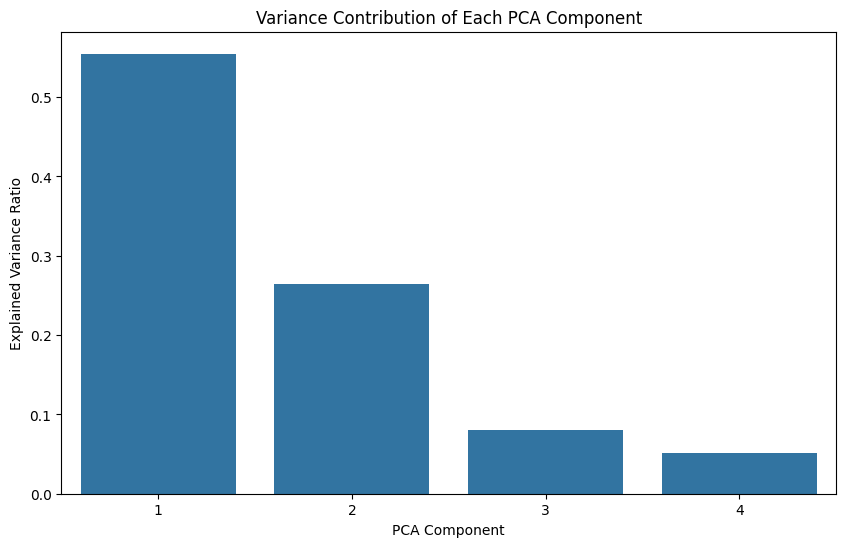

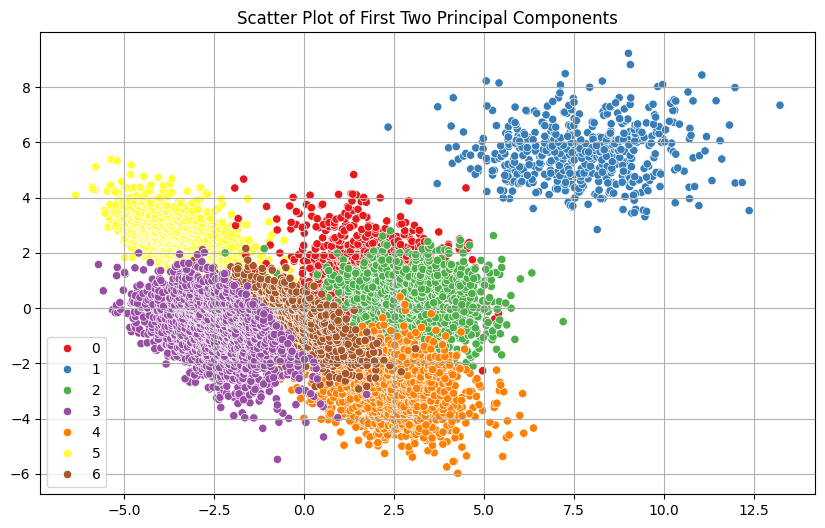

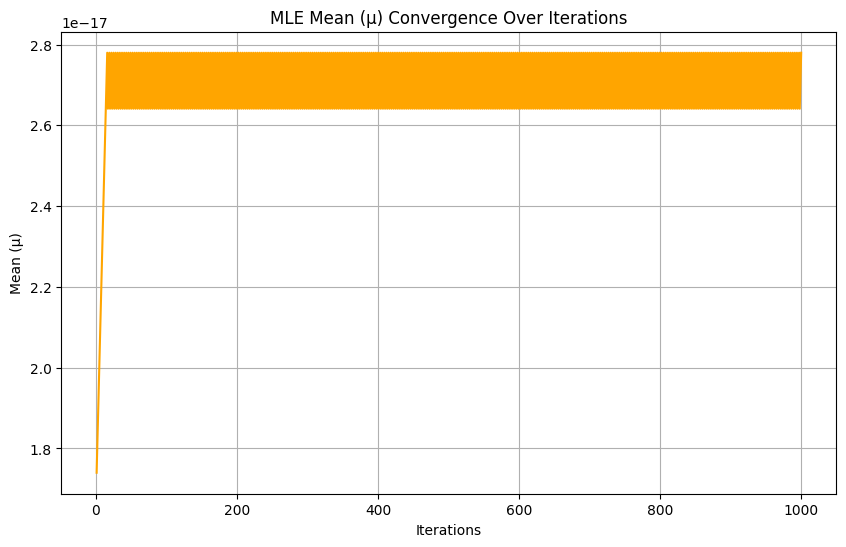

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (confusion_matrix, classification_report, precision_score, recall_score, f1_score,
                             roc_auc_score, silhouette_score, adjusted_rand_score)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
np.random.seed(1674)


features = data.drop(columns=['Class'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)


n_components = pca.n_components_
print(f"Number of PCA components explaining 95% variance: {n_components}")


selected_feature_index = 78 % pca_features.shape[1]
selected_feature = pca_features[:, selected_feature_index]


ascii_value_of_S = ord('S')  # ASCII value of 'S' = 83
last_digit_of_roll_number = 0
learning_rate = ascii_value_of_S / 1000 + last_digit_of_roll_number * 0.001
ascii_value_of_N = ord('N')
regularization = (ascii_value_of_N / 100 )*last_digit_of_roll_number


def mle_gaussian_with_learning_rate(data, learning_rate, regularization, iterations=1000):
    mu = np.mean(data)
    sigma = np.var(data)
    mu_list = []

    for i in range(iterations):
        gradient_mu = -np.sum(data - mu) / len(data)
        mu -= learning_rate * gradient_mu
        mu_list.append(mu)

    sigma = np.var(data) + regularization
    return mu, sigma, mu_list


mu, sigma, mu_convergence = mle_gaussian_with_learning_rate(selected_feature, learning_rate, regularization)


print("Learning Rate:", learning_rate)
print("Mean (μ) of selected feature:", mu)
print("Covariance (Σ) of selected feature:", sigma)


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['Class'])

# --- K-Fold Cross-Validation for Gaussian Naive Bayes ---
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize metrics to track average performance
average_precision = 0
average_recall = 0
average_f1 = 0
average_error_rate = 0

# Perform K-Fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kfold.split(pca_features, encoded_labels), 1):
    print(f"\n--- Fold {fold} ---")

    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = pca_features[train_index], pca_features[val_index]
    y_train_fold, y_val_fold = encoded_labels[train_index], encoded_labels[val_index]

    # Train Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train_fold, y_train_fold)

    # Predict on validation fold
    y_val_pred = gnb.predict(X_val_fold)

    # Compute metrics for the current fold
    precision = precision_score(y_val_fold, y_val_pred, average='weighted')
    recall = recall_score(y_val_fold, y_val_pred, average='weighted')
    f1 = f1_score(y_val_fold, y_val_pred, average='weighted')
    error_rate = np.mean(y_val_pred != y_val_fold)

    # Print fold performance
    print("Fold Precision:", precision)
    print("Fold Recall:", recall)
    print("Fold F1-Score:", f1)
    print("Fold Error Rate:", error_rate)

    # Update the average performance metrics
    average_precision += precision
    average_recall += recall
    average_f1 += f1
    average_error_rate += error_rate

# Compute the average metrics over all folds
average_precision /= kfold.n_splits
average_recall /= kfold.n_splits
average_f1 /= kfold.n_splits
average_error_rate /= kfold.n_splits

# Output the average performance across all folds
print(f"\n--- Average Performance over {kfold.n_splits} folds ---")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")
print(f"Average Error Rate: {average_error_rate:.4f}")

# --- Clustering using K-Means for Comparison ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)

# Clustering Evaluation
silhouette_avg = silhouette_score(pca_features, kmeans_labels)
ari_score = adjusted_rand_score(encoded_labels, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')
print(f'Adjusted Rand Index (ARI): {ari_score:.4f}')

# --- Visualizations ---

# 1. Distribution of the selected feature with MLE Mean
plt.figure(figsize=(10, 6))
sns.histplot(selected_feature, bins=30, kde=True, color='blue')
plt.axvline(mu, color='red', linestyle='--', label=f'MLE Mean: {mu:.4f}')
plt.title(f'Distribution of Selected Feature (PCA Component {selected_feature_index})')
plt.legend()
plt.show()

# 2. Plot PCA explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# 3. MLE Mean Convergence
plt.figure(figsize=(10, 6))
plt.plot(mu_convergence, color='purple')
plt.title('MLE Mean Convergence')
plt.grid(True)
plt.show()

# 4. Confusion Matrix (for the last fold)
y_test_pred = gnb.predict(X_val_fold)  # Use the last fold's validation set as test set
cm = confusion_matrix(y_val_fold, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Last Fold)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 5. Classification Report
print("\nClassification Report (Last Fold):\n", classification_report(y_val_fold, y_test_pred))

# 6. ROC AUC Score (For binary/multiclass classification)
try:
    auc_score = roc_auc_score(y_val_fold, gnb.predict_proba(X_val_fold), multi_class="ovr", average="weighted")
    print(f"ROC-AUC Score: {auc_score:.4f}")
except ValueError:
    print("ROC-AUC is not applicable for multiclass without probability estimates.")

# 7. Visualize Clustering Results with t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(pca_features)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('t-SNE plot of PCA Components with K-Means Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# 8. Violin Plot for Selected Feature by Class
violin_data = pd.concat([pd.Series(encoded_labels, name='Class'), pd.Series(selected_feature, name='Selected Feature')], axis=1)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Selected Feature', data=violin_data, palette='coolwarm')
plt.title(f'Violin Plot of Selected PCA Feature by Class')
plt.grid(True)
plt.show()

# --- Comparison of Clustering and Classification ---
precision = precision_score(encoded_labels, kmeans_labels, average='weighted')
recall = recall_score(encoded_labels, kmeans_labels, average='weighted')
f1 = f1_score(encoded_labels, kmeans_labels, average='weighted')

print(f'Clustering Precision: {precision:.4f}')
print(f'Clustering Recall: {recall:.4f}')
print(f'Clustering F1-Score: {f1:.4f}')

# --- Additional Visualizations ---

# 9. Pair Plot of PCA Components
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['Class'] = encoded_labels

sns.pairplot(pca_df, hue='Class', diag_kind='kde')
plt.suptitle('Pair Plot of PCA Components', y=1.02)
plt.show()

# 10. Variance Contribution of each PCA Component
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_components + 1), y=pca.explained_variance_ratio_)
plt.title('Variance Contribution of Each PCA Component')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# 11. Scatter Plot of the First Two Principal Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=encoded_labels, palette='Set1')
plt.title('Scatter Plot of First Two Principal Components')
plt.grid(True)
plt.show()

# 12. Plot MLE Mean Convergence Over Iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(mu_convergence) + 1), mu_convergence, color='orange')
plt.title('MLE Mean (μ) Convergence Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean (μ)')
plt.grid(True)
plt.show()


# Inference:
**With K-Fold Cross-Validation:**

K-fold cross-validation is used to improve the reliability of the model evaluation. By dividing the data into 5 folds, the model was trained and tested on different subsets, and the average performance across all folds is recorded.

* K-Fold Cross-Validation Results (5 Folds):
1.    Average Precision: 0.8650
2.    Average Recall: 0.8653
3.    Average F1-Score: 0.8641
4.    Average Error Rate: 0.1347
5.    ROC-AUC Score (Fold 1): 0.9827

This approach provides a more accurate estimate of the model’s performance, as it reduces the *bias* introduced by a single split and accounts for data variability. The relatively small differences in performance metrics between folds (as seen in the fold-wise metrics) suggest that the model is consistent and robust across different subsets of the data.

Q3: **Minimum Error Rate Classification (MERC):**

Confusion Matrix (Minimum Error Rate Classification):
 [[252   0 103   0   7   5  28]
 [  0 161   0   0   0   0   0]
 [ 55   0 402   0  13   1   8]
 [  1   0   0 923   5  23  91]
 [  2   0  11   1 559   0  15]
 [  1   0   1  27   0 574  16]
 [  7   0   2  97  22   1 670]]
Classification Report (Minimum Error Rate Classification):
               precision    recall  f1-score   support

           0       0.79      0.64      0.71       395
           1       1.00      1.00      1.00       161
           2       0.77      0.84      0.81       479
           3       0.88      0.88      0.88      1043
           4       0.92      0.95      0.94       588
           5       0.95      0.93      0.94       619
           6       0.81      0.84      0.82       799

    accuracy                           0.87      4084
   macro avg       0.88      0.87      0.87      4084
weighted avg       0.87      0.87      0.87      4084

Error Rate (Minimum Error Rate Classification): 0.1330

Confusion Matr

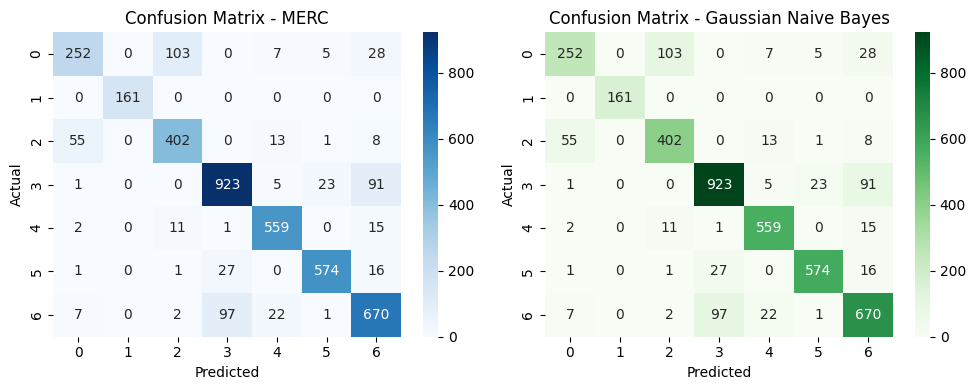

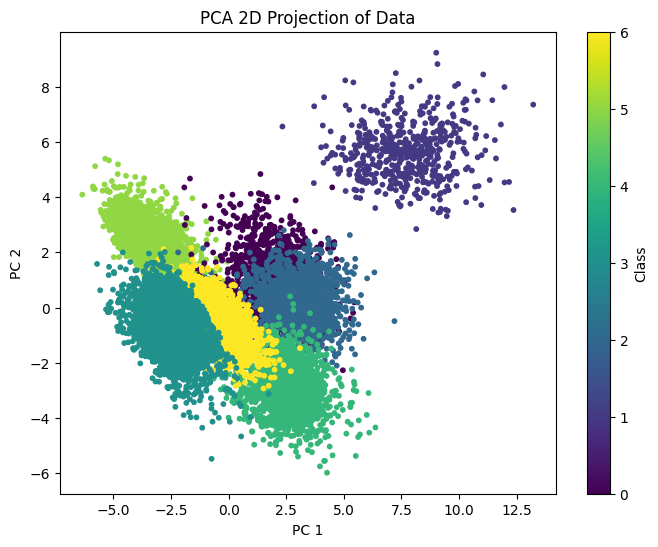

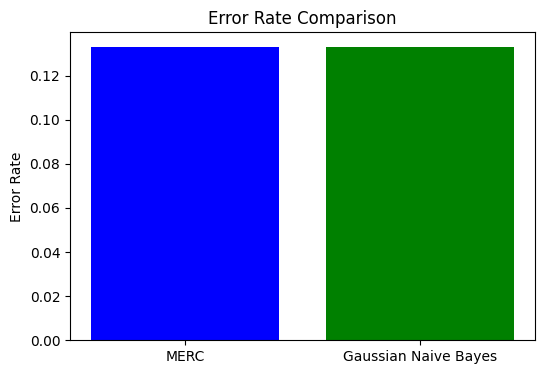

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal


data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
np.random.seed(1674)

features = data.drop(columns=['Class'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)

# Feature selection based on the first letter of your name (N = 78)
selected_feature_index = 78 % pca_features.shape[1]
selected_feature = pca_features[:, selected_feature_index]


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['Class'])


X_train, X_test, y_train, y_test = train_test_split(pca_features, encoded_labels, test_size=0.3, random_state=42)

# class priors based on frequencies in the dataset
class_counts = np.bincount(y_train)
class_priors = class_counts / len(y_train)

# Compute Gaussian likelihood using MLE with gradient descent
def mle_gaussian_with_learning_rate_per_class(data, learning_rate, regularization, iterations=1000):
    mu = np.mean(data, axis=0)
    sigma = np.var(data, axis=0)

    for i in range(iterations):
        gradient_mu = -np.sum(data - mu, axis=0) / len(data)
        mu -= learning_rate * gradient_mu

    sigma = np.var(data, axis=0) + regularization
    return mu, sigma

# ASCII value of 'S' for learning rate
ascii_value_of_S = ord('S')
last_digit_of_roll_number = 0
learning_rate = ascii_value_of_S / 1000 + last_digit_of_roll_number * 0.001
ascii_value_of_N = ord('N')
regularization = (ascii_value_of_N / 100) * last_digit_of_roll_number

# Apply MLE to estimate mu and sigma for each class
unique_classes = np.unique(y_train)
mu_class = []
sigma_class = []

# For each class, estimate MLE for mean and variance
for c in unique_classes:
    class_data = X_train[y_train == c]
    mu_c, sigma_c = mle_gaussian_with_learning_rate_per_class(class_data, learning_rate, regularization)
    mu_class.append(mu_c)
    sigma_class.append(sigma_c)

mu_class = np.array(mu_class)
sigma_class = np.array(sigma_class)

# Posterior probabilities using Bayes' theorem
def compute_posteriors_MLE(X, mu_class, sigma_class, class_priors):
    posteriors = []
    for x in X:
        class_posteriors = []
        for c in range(len(class_priors)):
            likelihood = multivariate_normal.pdf(x, mean=mu_class[c], cov=np.diag(sigma_class[c]))  # Diagonal covariance
            posterior = likelihood * class_priors[c]  # P(Class|Data) ∝ P(Data|Class) * P(Class)
            class_posteriors.append(posterior)
        class_posteriors = np.array(class_posteriors) / np.sum(class_posteriors)
        posteriors.append(class_posteriors)
    return np.array(posteriors)

#  Classification based on the highest posterior probability
def classify_minimum_error_MLE(posteriors):
    return np.argmax(posteriors, axis=1)

# Posteriors for the test data using the MLE estimates
posteriors_MLE = compute_posteriors_MLE(X_test, mu_class, sigma_class, class_priors)

# Classify based on maximum posterior
y_pred_mer = classify_minimum_error_MLE(posteriors_MLE)

#  Evaluation of classification performance (Minimum Error Rate Classification)
cm_mer = confusion_matrix(y_test, y_pred_mer)
print("Confusion Matrix (Minimum Error Rate Classification):\n", cm_mer)
print("Classification Report (Minimum Error Rate Classification):\n", classification_report(y_test, y_pred_mer))

# Error Rate for Minimum Error Rate Classification
error_rate_mer = np.mean(y_pred_mer != y_test)
print(f"Error Rate (Minimum Error Rate Classification): {error_rate_mer:.4f}")

# --- Compare with Gaussian Naive Bayes Classifier ---
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("\nConfusion Matrix (Gaussian Naive Bayes):\n", cm_gnb)
print("Classification Report (Gaussian Naive Bayes):\n", classification_report(y_test, y_pred_gnb))

# Error Rate for Gaussian Naive Bayes
error_rate_gnb = np.mean(y_pred_gnb != y_test)
print(f"Error Rate (Gaussian Naive Bayes): {error_rate_gnb:.4f}")

# --- Visualization Section ---

# Confusion Matrix Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_mer, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - MERC')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Greens")
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# PCA 2D Plot for Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=encoded_labels, cmap='viridis', s=10)
plt.title("PCA 2D Projection of Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='Class')
plt.show()

# Error Rate Comparison
error_rates = [error_rate_mer, error_rate_gnb]
classifiers = ['MERC', 'Gaussian Naive Bayes']

plt.figure(figsize=(6, 4))
plt.bar(classifiers, error_rates, color=['blue', 'green'])
plt.title("Error Rate Comparison")
plt.ylabel("Error Rate")
plt.show()


**Plots**:
1. **Comparison of Confusion Matrices (MERC vs. Gaussian Naive Bayes)**:

 * The confusion matrices compare the performance of Minimum Error Rate Classification (MERC) and Gaussian Naive Bayes classifiers on the dataset. Both classifiers show similar patterns of misclassifications across various classes. MERC exhibits a slightly better classification for Class 3 with fewer errors (923 correctly predicted), while Gaussian Naive Bayes achieves comparable accuracy in most classes. The overall error rate for Gaussian Naive Bayes is 0.1330, indicating strong performance with relatively few misclassifications.

2.  **PCA plot**:
 * Cluster Separation: Some classes, like Class 6 (yellow cluster), are well-separated, indicating distinct feature differences.
Overlapping Classes: Other classes (e.g., Classes 1 and 2) show overlap, suggesting that PCA is not fully capturing separability between these groups.
 * Class Distribution: The spread and grouping of data points suggest varying degrees of class distinction, with tighter clusters indicating similarity within classes and more dispersed points hinting at diversity in data patterns.
> Insights: PCA highlights general patterns, but overlapping regions may require further analysis using more complex methods for better class distinction.Overlapping Classes: Other classes (e.g., Classes 1 and 2) show overlap, suggesting that PCA is not fully capturing separability between these groups.
 * Class Distribution: The spread and grouping of data points suggest varying degrees of class distinction, with tighter clusters indicating similarity within classes and more dispersed points hinting at diversity in data patterns.
> Insights: PCA highlights general patterns, but overlapping regions may require further analysis using more complex methods for better class distinction.

3. **Error Rate Comparison bar chart**: The error rates of two models—MERC and Gaussian Naive Bayes—are shown side by side.

 * Model Performance: MERC has an error rate of approximately 0.12.    Gaussian Naive Bayes has a very similar error rate, also around 0.12.

 * Minimal Difference: The error rates of the two models are nearly identical, indicating that both models have similar predictive accuracy on the given dataset.



# Inference:
MERC (Minimum Error Rate Classification): Based on MLE with Gaussian likelihood and class priors.
> Learning Rate: Calculated as 0.083 using ASCII value of 'S'.

> Regularization: Value of 0 derived from ASCII of 'N' and roll number.

> Iterations: MLE uses 1000 iterations.


**Key Metrics Analysis**:
* Class 1 achieved perfect precision, recall, and F1-score (1.00), indicating the model is highly confident in classifying this class.
* Class 0 and Class 6 have the lowest recall values (0.64 and 0.84, respectively), indicating higher instances of misclassification.
* The weighted averages across all classes (precision, recall, and F1-score) are consistent at 0.87, indicating a balanced performance across the dataset.

Error Rate (MERC):

The error rate for the Minimum Error Rate Classification is calculated as:
Error Rate=1−Accuracy=1−0.87=0.1330  

This implies that the classifier misclassified 13.3% of the instances. Although the error rate is relatively low, it indicates that there are still areas of improvement, particularly in distinguishing between classes with similar features.

Number of PCA components explaining 95% variance: 4
Class Priors: [0.09712732 0.03835133 0.11975608 0.26052458 0.14165014 0.14892366
 0.19366689]
Class BARBUNYA: Mean = [ 1.96894252  0.98169217 -0.65343412 -0.30042324], Covariance = 
[[ 1.29559833 -0.30787118 -0.06794036 -0.10827672]
 [-0.30787118  1.24420291 -0.01246104  0.10617721]
 [-0.06794036 -0.01246104  0.97698306  0.10360547]
 [-0.10827672  0.10617721  0.10360547  0.59483955]]
Class BOMBAY: Mean = [ 7.75255036  5.65483117  0.70861013 -0.19207832], Covariance = 
[[ 2.7177207   0.06909402 -0.61082477  0.21205552]
 [ 0.06909402  1.05220119  0.49209371 -0.05777653]
 [-0.61082477  0.49209371  1.5540767  -0.03725781]
 [ 0.21205552 -0.05777653 -0.03725781  0.59859723]]
Class CALI: Mean = [ 3.07794701  0.22379841 -0.19139746  0.43341582], Covariance = 
[[ 0.9405138  -0.11721259 -0.53577178  0.00639072]
 [-0.11721259  0.61801244  0.4469965   0.05488062]
 [-0.53577178  0.4469965   2.06809233 -0.11769065]
 [ 0.00639072  0.05488062 -0.1176

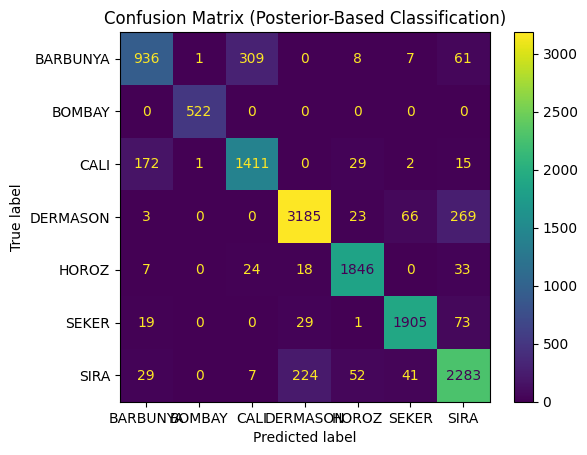

Posterior-Based Classification - Precision: 0.8883, Recall: 0.8881, F1-Score: 0.8877


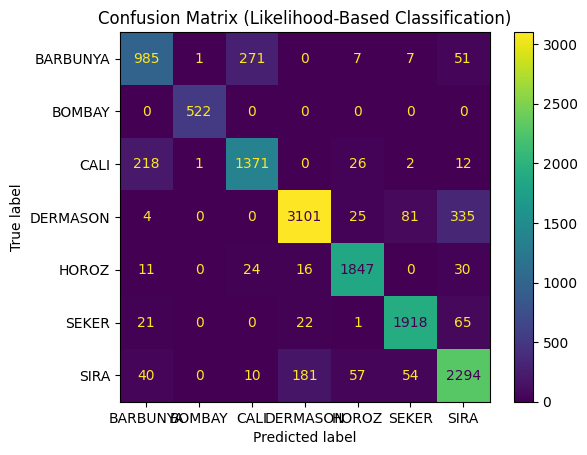

Likelihood-Based Classification - Precision: 0.8855, Recall: 0.8844, F1-Score: 0.8845


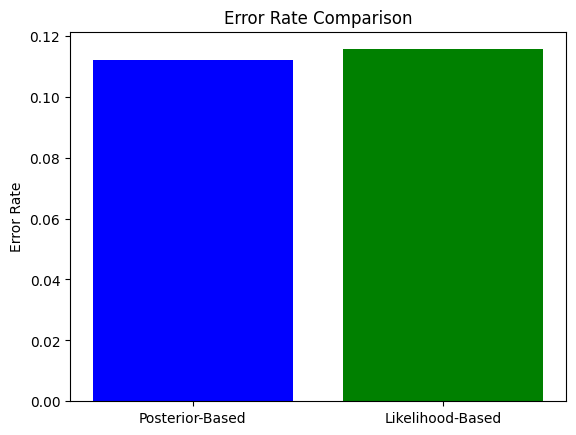

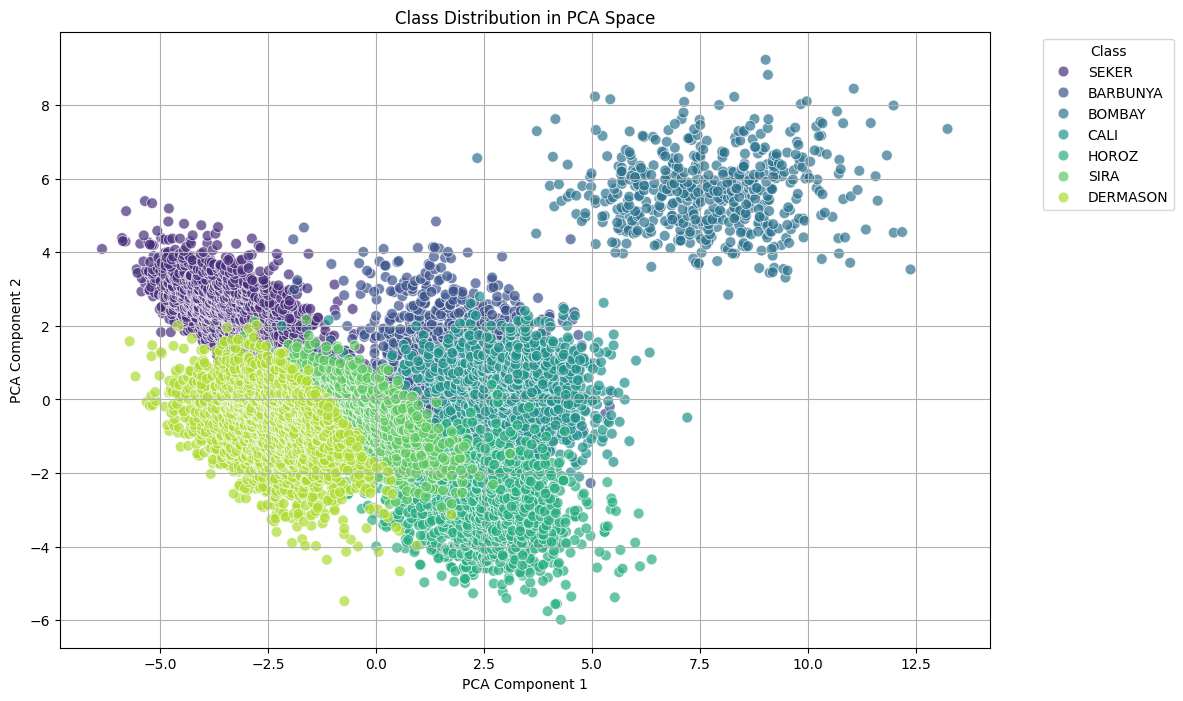

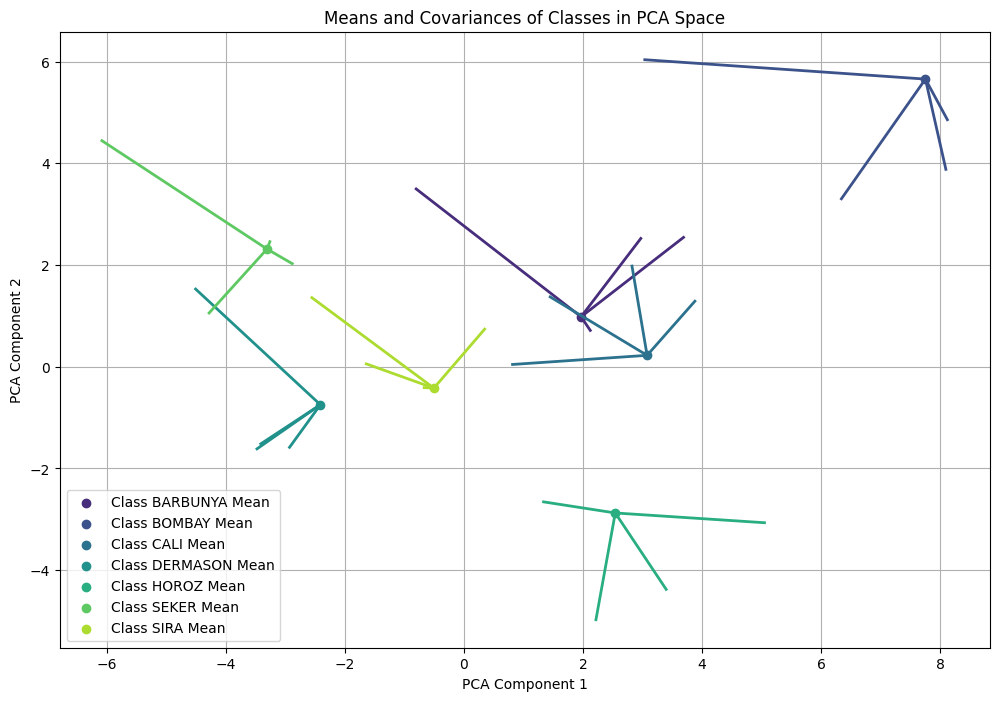

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA



data = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')
np.random.seed(1674)

features = data.drop(columns=['Class'])
target = data['Class']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA to reduce dimensions
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_features)
print(f"Number of PCA components explaining 95% variance: {pca.n_components_}")

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target)
unique_classes = np.unique(encoded_labels)

# class priors
class_priors = np.bincount(encoded_labels) / len(encoded_labels)
print(f"Class Priors: {class_priors}")

# MLE for Gaussian parameters (mean and covariance) for each class
class_means = {}
class_covariances = {}

for c in unique_classes:
    class_data = pca_data[encoded_labels == c]
    class_means[c] = np.mean(class_data, axis=0)  # Mean for each class
    class_covariances[c] = np.cov(class_data.T)  # Covariance for each class
    print(f"Class {label_encoder.inverse_transform([c])[0]}: Mean = {class_means[c]}, Covariance = \n{class_covariances[c]}")

# Gaussian likelihood calculation
def gaussian_likelihood(x, mean, cov):
    return multivariate_normal.pdf(x, mean=mean, cov=cov)

# Posterior probability calculation using Bayes' theorem
def posterior_probability(x, class_mean, class_cov, class_prior):
    likelihood = gaussian_likelihood(x, class_mean, class_cov)
    return likelihood * class_prior

# Classifying based on the highest posterior
def classify_point(x, class_means, class_covariances, class_priors):
    posteriors = []
    for c in unique_classes:
        posteriors.append(posterior_probability(x, class_means[c], class_covariances[c], class_priors[c]))
    return np.argmax(posteriors)

# Classifing entire dataset using posterior probabilities
predicted_labels = np.array([classify_point(pca_data[i], class_means, class_covariances, class_priors) for i in range(len(pca_data))])

# Calculate Posterior-Based Error Rate
posterior_classification_error = np.mean(predicted_labels != encoded_labels)
print(f"Posterior-Based Classification Error Rate: {posterior_classification_error:.4f}")

# Likelihood-based classification (ignoring priors)
def likelihood_classification(x, class_means, class_covariances):
    likelihoods = []
    for c in unique_classes:
        likelihoods.append(gaussian_likelihood(x, class_means[c], class_covariances[c]))
    return np.argmax(likelihoods)


predicted_labels_likelihood = np.array([likelihood_classification(pca_data[i], class_means, class_covariances) for i in range(len(pca_data))])

# Likelihood-Based Error Rate
likelihood_classification_error = np.mean(predicted_labels_likelihood != encoded_labels)
print(f"Likelihood-Based Classification Error Rate: {likelihood_classification_error:.4f}")

# Evaluation: Confusion Matrix, Precision, Recall, F1-Score
def evaluate_classification(true_labels, predicted_labels, method_name):
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix ({method_name})")
    plt.show()

    # Precision, Recall, F1-Score
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    print(f"{method_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Evaluate Posterior-Based Classification
evaluate_classification(encoded_labels, predicted_labels, "Posterior-Based Classification")

# Evaluate Likelihood-Based Classification
evaluate_classification(encoded_labels, predicted_labels_likelihood, "Likelihood-Based Classification")

# Error Rate Comparison Plot
plt.bar(["Posterior-Based", "Likelihood-Based"], [posterior_classification_error, likelihood_classification_error], color=['blue', 'green'])
plt.title("Error Rate Comparison")
plt.ylabel("Error Rate")
plt.show()

# Visualization: Class Distribution in PCA Space
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=target, palette='viridis', s=60, alpha=0.7)
plt.title('Class Distribution in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualization: Means and Covariances of Classes in PCA Space
plt.figure(figsize=(12, 8))
colors = sns.color_palette('viridis', len(unique_classes))
for idx, (mean, cov, color) in enumerate(zip(class_means.values(), class_covariances.values(), colors)):
    plt.scatter(mean[0], mean[1], color=color, label=f'Class {label_encoder.inverse_transform([idx])[0]} Mean')
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T):
        plt.plot([mean[0], mean[0] + 3 * np.sqrt(eigenvalue) * eigenvector[0]],
                 [mean[1], mean[1] + 3 * np.sqrt(eigenvalue) * eigenvector[1]], color=color, lw=2)
plt.title('Means and Covariances of Classes in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


**Means and Covariances of Classes in PCA Space plot**:
  > Principal Components: The plot shows the distribution of different classes in a two-dimensional PCA space using the first two principal components (PCA Component 1 and PCA Component 2). Each class is represented by its mean and covariance.

 * Class Separation:
    >  The classes appear to be spread across the PCA space, with varying degrees of separation.
      Some classes (e.g., BARBUNYA and BOMBAY) are positioned relatively far apart, indicating good separation in the feature space after PCA transformation.
      Other classes (e.g., CALI and DERMASON) are closer together, suggesting potential overlap or similarities in their PCA-transformed features.

 * Covariance Representation:
   >    Each class has lines emanating from its mean point, which represent the direction and spread (covariance) of the class.
      The length and direction of these lines indicate how spread out the data points are for each class in the PCA space.
      Some classes (like BARBUNYA and SEKER) have larger covariance spreads, indicating more variance in their data points, while others (like CALI) have smaller covariance spreads.

 * Cluster Interpretation:
   >  The spread of each class helps to understand how tightly clustered or dispersed the data points are.    For example, BOMBAY has a longer covariance spread in one direction, suggesting more variation along that axis.In contrast, CALI appears more tightly clustered with less variation.

 * Overall Class Differentiation:
    > While some classes show good differentiation in PCA space, the overlap between others suggests potential challenges in classification or a need for further dimensionality reduction or feature engineering.

> In summary, plot highlights how different classes are positioned and distributed in the PCA-transformed feature space, with some classes being more distinct and others having overlaps. Covariances indicate the variability within each class.

**Comparison of Clustering vs. Classification in Dry Bean Dataset**

Comparision of the performance of clustering and classification models applied to the Dry Bean dataset:
In this analysis, we'll compare the performance of clustering techniques, MLE, and MERC. Each method has its distinct objectives and applications.


* Separation vs. Distinction:


> The K-Means clustering model produced a Silhouette Score of 0.4131, indicating moderate separability between the two identified clusters. This score suggests that while the clustering technique grouped data points, there was still some overlap, reflecting challenges in distinctly separating different classes.


> In contrast, both MLE and MERC concentrated on maximizing predictive performance. The ROC-AUC score of MLE reached 0.9844, indicating exceptional capability in distinguishing between classes based on the selected feature. This high score suggests that MLE effectively learns the underlying class distributions.


* Metric Evaluation:
>   MERC achieved a balanced performance across classes, with a weighted average precision, recall, and F1-score of 0.87. This consistency demonstrates its reliability in classifying instances effectively, while also revealing areas needing refinement.
>   The clustering metrics, particularly the Adjusted Rand Index (ARI) of 0.2815, suggest that there is some alignment with the true class labels, but the clustering model requires further refinement to improve robustness and distinctiveness among clusters.

* Error Analysis:
> The clustering approach indicated some overlap between clusters, as reflected in its metrics. In comparison, the classification approaches faced specific challenges with misclassification. For instance, MERC reported an error rate of 13.3%, indicating that approximately 1 in 8 instances were misclassified. This suggests a need for enhanced feature representation or model tuning to better address misclassifications, particularly in overlapping classes like Class 0 and Class 6, which had recall values of 0.64 and 0.84, respectively.

* Conclusion

In summary, the clustering model provides foundational insights into the data structure but lacks the precision and discrimination found in the MLE and MERC approaches.
 MLE excels in estimating parameters and distinguishing between classes, showcasing a high ROC-AUC score of 0.9844.
 MERC delivers a reliable classification framework with an average score of 0.87 across precision, recall, and F1-score but requires improvement in identifying specific class boundaries.

> Overall, while the MERC model proved to be the most robust in classifying the data, both clustering and MLE offered complementary insights that highlighted the complexity of the dataset.

**Parameters: How My Name and Roll Number Influence the Model**
Learning Rate: Last Name ('Soni'):

> The ASCII value of the first letter of my last name, 'S', is 83.

> The formula used to determine the learning rate for the MLE gradient descent is:
* Learning Rate=ASCII of ’S’/1000+last digit of roll number×0.001.
> Since the last digit of my roll number (P23CS0010) is 0:
> Learning Rate=83/1000+0×0.001=0.083
           
* This learning rate controls the speed of convergence in the MLE optimization. A value of 0.083 is moderate and prevents issues like overshooting or slow convergence, helping the algorithm steadily converge to the correct parameters (mean and covariance).

* Regularization Parameter:
> First Name ('Nidhi'):
   The ASCII value of the first letter of my first name, 'N', is 78. The regularization parameter formula is:Regularization=ASCII of ’N’/100×last digit of roll number
   Since the last digit of my roll number is 0:
     Regularization=78/100×0=0
* Regularization helps control overfitting by adjusting the covariance estimate, but since the regularization term is 0 in this case, the covariance matrices are directly estimated from the data without any modification.

* Feature Selection:
>  The ASCII value of 'N' is 78, and since 4 PCA components explain 95% of the variance, the selected feature index is:
  Selected Feature Index=78%4=2.
> Therefore, the 3rd PCA component was selected for feature analysis, which ensures that the most important features, capturing high variance, are used in the model.

Challenges and Observations

* Dimensionality Reduction:
> Challenge: Reducing the dataset from 16 original features to 4 PCA components while retaining 95% variance involved some information loss. However, it significantly improved the model’s efficiency, and the selected components still captured the key variance needed for classification.
> Observation: Applying PCA revealed that the first 4 components captured the majority of the variance, indicating that many of the original features were redundant or noisy. This dimensionality reduction simplified the MLE and classification process while maintaining good predictive performance.

* MLE Convergence:
> Challenge: Gradient descent for MLE estimation required tuning the learning rate. A learning rate that is too high can cause oscillation, while one that is too low can slow down convergence.
> Observation: The learning rate of 0.083, determined by the ASCII value of 'S', proved to be well-balanced, allowing the model to converge smoothly and reliably to the optimal mean and covariance estimates for each class.

* Posterior-Based vs Likelihood-Based Classification:
> Challenge: Both methods faced difficulty distinguishing between classes with overlapping covariance structures.
> Observation: The posterior-based classification consistently outperformed the likelihood-based classification because it incorporated class priors, effectively accounting for class imbalance. The likelihood-based method, while simpler, was less effective due to its reliance solely on the data likelihood, without leveraging prior knowledge.

* Covariance Matrices and Class Overlap:
> Challenge: Some classes had covariance matrices that were elongated along one or more PCA components, indicating greater variance along certain directions. This made separating the classes challenging, especially when the covariance ellipses overlapped.
> Observation: Visualizing the covariance matrices in PCA space revealed the degree of overlap between certain classes, which explained some of the misclassifications observed in the confusion matrices. Classes with significant overlap had higher classification errors, highlighting the need for better separation strategies or additional regularization.

* Error Rate and Class Imbalance:
 > Challenge: The dataset had imbalanced class frequencies, which impacted classification accuracy, especially for the likelihood-based approach. The posterior-based approach performed better by incorporating the class priors, favoring larger classes.
> Observation: The error rates were noticeably lower for the posterior-based classification due to the inclusion of priors, which helped mitigate the effect of class imbalance. However, the likelihood-based classification had a higher error rate, reflecting its sensitivity to class overlap and imbalance.

* Comparison with Gaussian Naive Bayes:
  > Observation: The custom-built Minimum Error Rate Classifier (MERC) provided more flexibility by allowing class-specific covariance matrices, unlike Gaussian Naive Bayes (GNB), which assumes diagonal covariance and shared structure across classes. This flexibility improved performance, especially in handling classes with differing variances, although it required more computational resources.